In [2]:
#Dataset S3 Location
#Importing Raw Datasets from AWS S3
!aws s3 ls s3://ads508rawdatasets/CSV/OHSU_BeatAML_ClinicalSummary/

2023-03-27 03:13:36          0 
2023-03-27 03:13:59     712668 OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [3]:
!aws s3 ls s3://ads508rawdatasets/CSV/OpenCell_ProteinInteraction/

2023-03-27 03:15:14          0 
2023-03-27 03:17:18    4568928 opencell-protein-interactions.csv


In [4]:
#Check pre-requisites from the 01_setup Folder
%store -r setup_instance_check_passed

In [5]:
try:
    setup_instance_check_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++")

In [6]:
print(setup_instance_check_passed)

True


In [7]:
%store -r setup_dependencies_passed

In [8]:
try:
    setup_dependencies_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++")

In [9]:
print(setup_dependencies_passed)

True


In [10]:
%store -r setup_s3_bucket_passed

In [11]:
try:
    setup_s3_bucket_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++")

In [12]:
print(setup_s3_bucket_passed)

True


In [13]:
%store -r setup_iam_roles_passed

In [14]:
try:
    setup_iam_roles_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++")

In [15]:
print(setup_iam_roles_passed)

False


In [16]:
if not setup_instance_check_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_dependencies_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_s3_bucket_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_iam_roles_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [17]:
import boto3
import sagemaker
import pandas as pd
import time
from time import gmtime, strftime

sess = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sess.default_bucket()
region = boto3.Session().region_name
account_id = boto3.client("sts").get_caller_identity().get("Account")

sm = boto3.Session().client(service_name="sagemaker", region_name=region)


In [437]:
#Set S3 Source Location
#BeatAML Clinical Summary
s3_public_path_clsm = "s3://ads508rawdatasets/CSV/OHSU_BeatAML_ClinicalSummary/"

In [438]:
%store s3_public_path_clsm

Stored 's3_public_path_clsm' (str)


In [439]:
print(s3_public_path_clsm)

s3://ads508rawdatasets/CSV/OHSU_BeatAML_ClinicalSummary/


In [440]:
!aws s3 ls $s3_public_path_clsm

2023-03-27 03:13:36          0 
2023-03-27 03:13:59     712668 OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [441]:
#BeatAML OpenCell Protein Interaction 
s3_public_path_pi = "s3://ads508rawdatasets/CSV/OpenCell_ProteinInteraction/"

In [442]:
%store s3_public_path_pi

Stored 's3_public_path_pi' (str)


In [443]:
print(s3_public_path_pi)

s3://ads508rawdatasets/CSV/OpenCell_ProteinInteraction/


In [444]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://s3.console.aws.amazon.com/s3/buckets/team4rawdatasets?prefix=CSV/Input/&region=us-east-1">S3 Bucket</a></b>'.format(
            region, account_id, region
        )
    )
)

In [26]:
#Athena Database: PyAthena is a Python DB API 2.0 (PEP 249) compliant client for Amazon Athena.
!pip install --disable-pip-version-check -q PyAthena==2.1.0
from pyathena import connect

In [27]:
ingest_create_athena_db_passed = False

In [28]:
database_name = "bcr"

In [29]:
role_name = role.split("/")[-1]

print("Role name: {}".format(role_name))

Role name: AmazonSageMaker-ExecutionRole-20230319T210510


In [30]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

In [31]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [32]:
statement0 = "CREATE DATABASE IF NOT EXISTS {}".format(database_name)
print(statement0)

CREATE DATABASE IF NOT EXISTS bcr


In [ ]:
pd.read_sql(statement0, conn)

In [33]:
statement00 = "SHOW DATABASES"

df_show = pd.read_sql(statement00, conn)
df_show.head(5)

database_name
0     aws508bcr
1       default

In [34]:
if database_name in df_show.values:
    ingest_create_athena_db_passed = True

In [35]:
%store ingest_create_athena_db_passed

Stored 'ingest_create_athena_db_passed' (bool)


In [36]:
#Athena Table Created Through AWS Glue Crawler
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="top" href="https://us-east-1.console.aws.amazon.com/glue/home?region=us-east-1#/v2/data-catalog/tables">AWS Glue Catalog</a></b>'.format(
            region
        )
    )
)

In [37]:
# Set Athena database & table
table_clsm = "ohsu_beataml_clinicalsummary"
table_pi = "opencell_proteininteraction"

In [38]:
#Athena SQL Code
statement1 = """
SELECT *
FROM {}.{} 
""".format(
    database_name, table_pi
)

print(statement1)


SELECT *
FROM bcr.opencell_proteininteraction 



In [ ]:
pi = pd.read_sql(statement1, conn)

In [39]:
#Data Cleaning
#Import Tools
!pip install klib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [40]:
#BeatAML Clinical Summary: OHSU BeatAML Clinical Summary Table
#SQL statement
statement2 = """
SELECT *
FROM {}.{} 
""".format(
    database_name, table_clsm
)

print(statement2)


SELECT *
FROM bcr.ohsu_beataml_clinicalsummary 



In [ ]:
clsm = pd.read_sql(statement2, conn)

In [763]:
import numpy as np
import seaborn as sns
import klib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [764]:
!aws s3 cp 's3://ads508rawdatasets/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv' ./data/

download: s3://ads508rawdatasets/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv to data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [765]:
!aws s3 cp 's3://ads508rawdatasets/opencell-protein-interactions.csv' ./data/

download: s3://ads508rawdatasets/opencell-protein-interactions.csv to data/opencell-protein-interactions.csv


In [766]:
import csv

pi = pd.read_csv('s3://ads508rawdatasets/opencell-protein-interactions.csv')
pi.head(5)

target_gene_name interactor_gene_name   target_ensg_id interactor_ensg_id  \
0             AAMP               ARGLU1  ENSG00000127837    ENSG00000134884   
1             AAMP              CWF19L2  ENSG00000127837    ENSG00000152404   
2             AAMP              PRPF40A  ENSG00000127837    ENSG00000196504   
3             AAMP                RPL10  ENSG00000127837    ENSG00000147403   
4             AAMP                RSRC1  ENSG00000127837    ENSG00000174891   

                              interactor_uniprot_ids       pval  enrichment  \
0                           Q9NWB6;Q9NWB6-3;Q9NWB6-2   5.495914    2.868131   
1             Q2TBE0;Q2TBE0-2;H7C3G7;Q2TBE0-3;H0YE03   5.480125    2.889502   
2  A0A3F2YNY6;O75400-2;O75400-3;O75400;H0YG38;F5H578   5.321102    3.228531   
3                 X1WI28;P27635;B8A6G2;A6QRI9;Q96L21  15.156173    4.847218   
4  Q96IZ7-2;Q96IZ7;H7C5Q0;C9J713;C9J367;C9J8Q2;C9...   5.929453    3.239392   

   interaction_stoichiometry  abundance_stoichiometry  
0                   0.128618                 0.222927  
1                   0.022009                 0.063036  
2                   0.001582                 0.742017  
3                   0.521148                13.146910  
4                   0.013171                 0.210926

In [767]:
clsm = pd.read_csv('s3://ads508rawdatasets/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv')
clsm.head(5)

LabId  PatientId consensus_sex inferred_sex inferred_ethnicity  \
0  09-00705        163          Male         Male              White   
1  10-00136        174          Male         Male              White   
2  10-00172        175        Female         Male              White   
3  10-00507         45        Female       Female              White   
4  10-00542        174          Male         Male              White   

   centerID CEBPA_Biallelic  ageAtDiagnosis  isRelapse  isDenovo  ...  STAG2  \
0         1               n            73.0      False      True  ...    NaN   
1         1               n            69.0      False      True  ...    NaN   
2         1               n            59.0      False      True  ...    NaN   
3         1               n            70.0      False      True  ...    NaN   
4         1               n            69.0       True     False  ...    NaN   

  STAT3  SUZ12  TCL1A TET2 TP53 TYK2 U2AF1  WT1 ZRSR2  
0   NaN    NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  
1   NaN    NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  
2   NaN    NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  
3   NaN    NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  
4   NaN    NaN    NaN  NaN  NaN  NaN   NaN  NaN   NaN  

[5 rows x 159 columns]

In [768]:
clsm = clsm.replace('', np.NAN)
clsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Columns: 159 entries, LabId to ZRSR2
dtypes: bool(9), float64(22), int64(7), object(121)
memory usage: 793.5+ KB


GridSpec(6, 6)

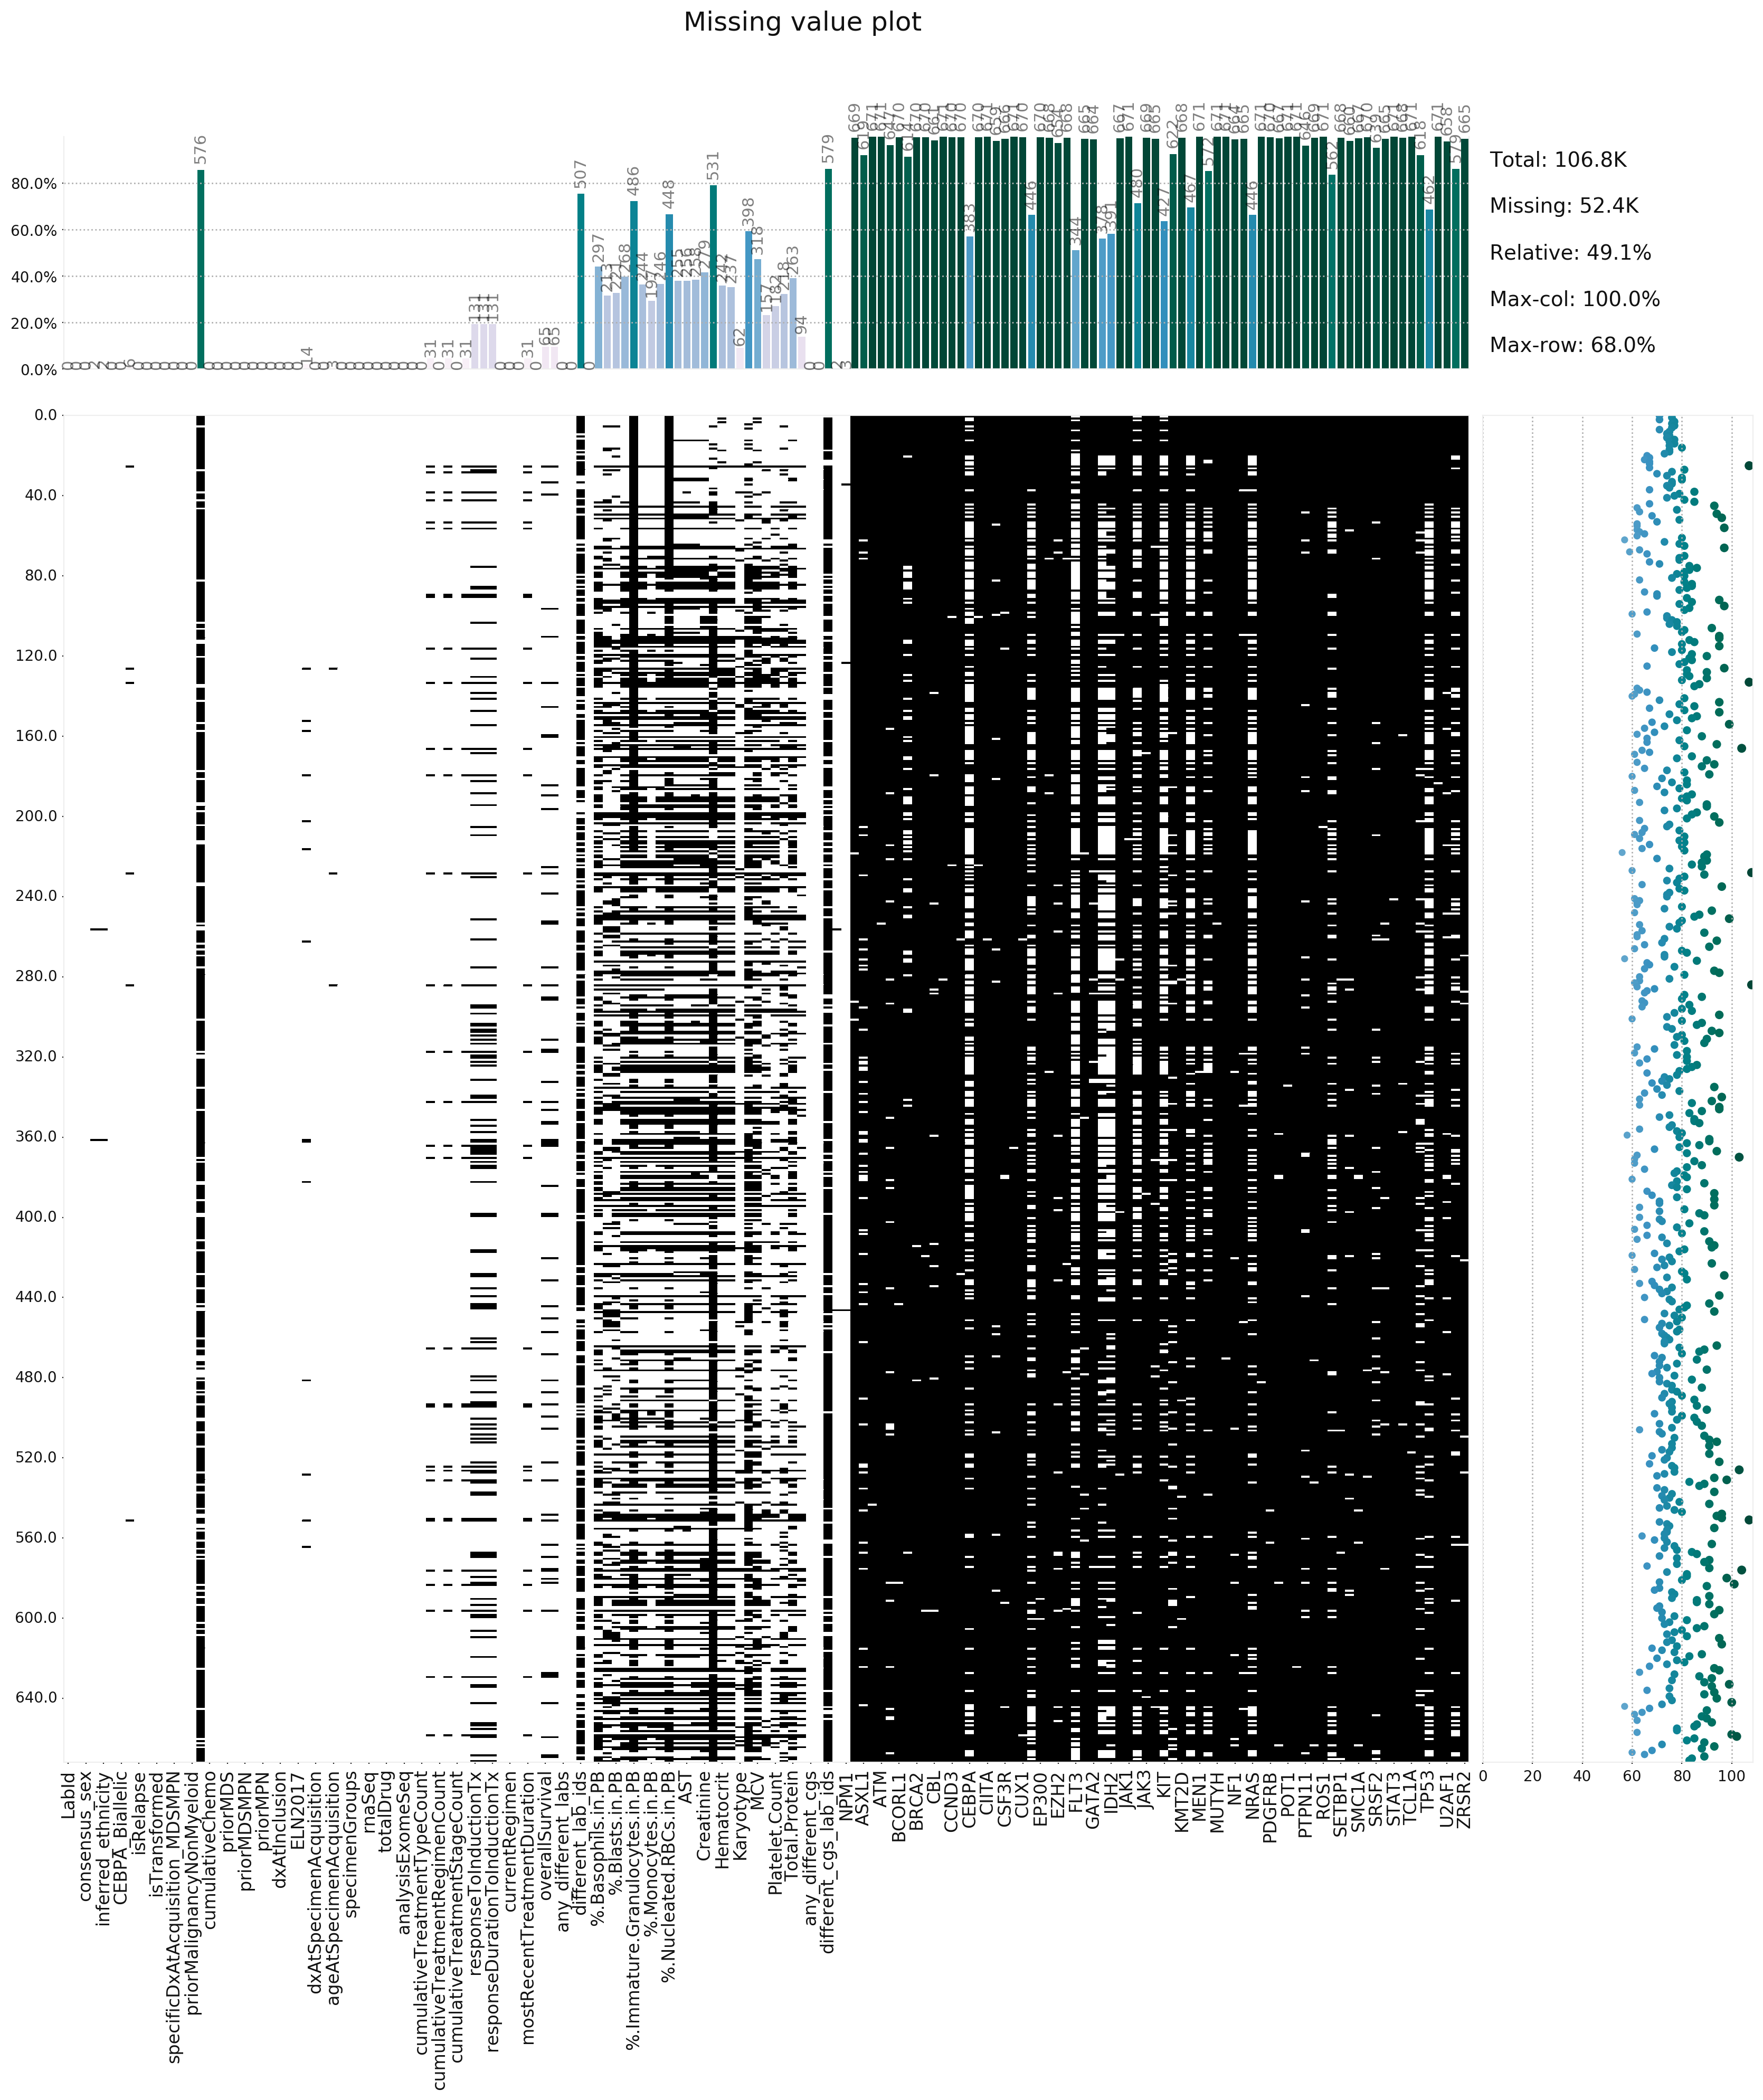

In [769]:
klib.missingval_plot(clsm)

In [770]:
#Create new dataframe to retain relevant features for further use
clsm_cut = pd.DataFrame(clsm[['LabId', 'PatientId', 'consensus_sex', 'inferred_ethnicity', 'isRelapse',
                             'isTransformed', 'priorMalignancyNonMyeloid', 'priorMDS', 'priorMDSMPN', 'priorMPN',
                             'ELN2017', 'dxAtSpecimenAcquisition', 'vitalStatus', 'overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 
                             'FLT3-ITD', 'NPM1']])
clsm_cut.head()

LabId  PatientId consensus_sex inferred_ethnicity  isRelapse  \
0  09-00705        163          Male              White      False   
1  10-00136        174          Male              White      False   
2  10-00172        175        Female              White      False   
3  10-00507         45        Female              White      False   
4  10-00542        174          Male              White       True   

   isTransformed priorMalignancyNonMyeloid priorMDS priorMDSMPN priorMPN  \
0          False                         n        n           n        n   
1          False                         n        n           n        n   
2          False                         n        n           n        n   
3          False                         n        n           n        n   
4          False                         n        n           n        n   

                   ELN2017                            dxAtSpecimenAcquisition  \
0  FavorableOrIntermediate  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
1                  Adverse  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
2    IntermediateOrAdverse  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
3  FavorableOrIntermediate  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
4                  Adverse  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   

  vitalStatus  overallSurvival %.Blasts.in.BM %.Blasts.in.PB  FLT3-ITD  \
0        Dead            425.0             94             97  positive   
1        Dead            419.0             80             19  positive   
2        Dead            541.0             91             99  positive   
3        Dead            511.0             97             97  positive   
4        Dead            419.0             87             80  positive   

       NPM1  
0  positive  
1  negative  
2  negative  
3  positive  
4  negative

In [771]:
clsm_cut.tail()

LabId  PatientId consensus_sex inferred_ethnicity  isRelapse  \
667  17-00072       4366          Male              White      False   
668  17-00077       4317        Female              White      False   
669  17-00093       4379        Female              Black      False   
670  17-00094       4380          Male              White      False   
671  17-00096       2747          Male              White      False   

     isTransformed priorMalignancyNonMyeloid priorMDS priorMDSMPN priorMPN  \
667           True                         n        n           n        y   
668          False                         n        n           n        n   
669           True                         n        n           n        y   
670           True                         n        n           n        y   
671           True                         n        n           y        n   

          ELN2017                            dxAtSpecimenAcquisition  \
667  Intermediate  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
668     Favorable  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
669  Intermediate  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
670       Adverse  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
671  Intermediate  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   

    vitalStatus  overallSurvival %.Blasts.in.BM %.Blasts.in.PB  FLT3-ITD  \
667        Dead            362.0            NaN           53.2  negative   
668     Unknown              NaN             90             74  negative   
669     Unknown              NaN            NaN             48  positive   
670       Alive            153.0             20            NaN  negative   
671       Alive            256.0            NaN            NaN  negative   

         NPM1  
667  negative  
668  negative  
669  negative  
670  negative  
671  negative

In [772]:
clsm_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LabId                      672 non-null    object 
 1   PatientId                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         670 non-null    object 
 4   isRelapse                  672 non-null    bool   
 5   isTransformed              672 non-null    bool   
 6   priorMalignancyNonMyeloid  672 non-null    object 
 7   priorMDS                   672 non-null    object 
 8   priorMDSMPN                672 non-null    object 
 9   priorMPN                   672 non-null    object 
 10  ELN2017                    672 non-null    object 
 11  dxAtSpecimenAcquisition    672 non-null    object 
 12  vitalStatus                672 non-null    object 
 13  overallSurvival            607 non-null    float64

In [773]:
clsm_cut.describe()

PatientId  overallSurvival
count   672.000000       607.000000
mean   2088.020833       441.881384
std     973.372734       479.180429
min      17.000000        -1.000000
25%    1450.750000       167.000000
50%    2016.000000       323.000000
75%    2501.500000       555.000000
max    4380.000000      5305.000000

In [774]:
#Attribute Transformation - %.Blasts.in.BM'
#Identify unique values in %.Blasts.in.BM'
clsm_cut['%.Blasts.in.BM'].unique()

array(['94', '80', '91', '97', '87', nan, '40', '75', '83', '95', '85',
       '90', '70', '92', '72', '68', '88', '36', '81', '93', '34', '77.5',
       '46', '65', '50', '76', '71', '60', '73', '55', '0.5', '30', '62',
       '18', '82', '28', '41', '64', '84', '21', '51', '17', '49.4', '32',
       '29', '25', '59.3', '66', '20', '52', '54', '22', '10', '12', '13',
       '67', '39', '25.9', '45', '37', '78', '8', '3', '54.8', '74', '96',
       '4', '86.1', '42', '56', '69', '79', '33', '9', '0.4', '51.5',
       '15', '5', '24', '7', '2', '6', '1', '58', '>50', '35', '86',
       '93.2', '0', '27', '89.6', '23', '98', '19', '91.8', '>95', '57',
       '71.5', '78.3', '63', '1.5', '53.74', '59.5', '44', '42.5', '26',
       '3.5', '48', '26.3', '47', '88.5'], dtype=object)

In [775]:
# > and < will be changed to whole numbers less than or greater than.
clsm_cut['%.Blasts.in.BM'] = clsm_cut['%.Blasts.in.BM'].replace(['>50'], 51)
clsm_cut['%.Blasts.in.BM'] = clsm_cut['%.Blasts.in.BM'].replace(['>95'], 96)

clsm_cut['%.Blasts.in.BM'].unique()

array(['94', '80', '91', '97', '87', nan, '40', '75', '83', '95', '85',
       '90', '70', '92', '72', '68', '88', '36', '81', '93', '34', '77.5',
       '46', '65', '50', '76', '71', '60', '73', '55', '0.5', '30', '62',
       '18', '82', '28', '41', '64', '84', '21', '51', '17', '49.4', '32',
       '29', '25', '59.3', '66', '20', '52', '54', '22', '10', '12', '13',
       '67', '39', '25.9', '45', '37', '78', '8', '3', '54.8', '74', '96',
       '4', '86.1', '42', '56', '69', '79', '33', '9', '0.4', '51.5',
       '15', '5', '24', '7', '2', '6', '1', '58', 51, '35', '86', '93.2',
       '0', '27', '89.6', '23', '98', '19', '91.8', 96, '57', '71.5',
       '78.3', '63', '1.5', '53.74', '59.5', '44', '42.5', '26', '3.5',
       '48', '26.3', '47', '88.5'], dtype=object)

In [776]:
#Attribute Transformation - %.Blasts.in.PB'
#Identify unique values in %.Blasts.in.PB'
clsm_cut['%.Blasts.in.PB'].unique()

array(['97', '19', '99', '80', nan, '51', '30', '41', '84', '77', '75',
       '63', '60', '96', '66', '45', '93', '9', '82', '15', '33', '0',
       '13', '94', '89', '83', '>90', '78', '72', '59', '32', '6', '29',
       '24', '64', '57', '52', '2.1', '<5', '17', '22', '5', '47', '56',
       '25', '23', '42', '65', '71', '8', '3.5', '66.3', '95', '44', '10',
       '28.6', '18', '58', '67', '40', '92', '54', '1', '2', '20', '28',
       '35', '85', '42.4', '16', '49.1', '14', '88', '46', '7', '0.5',
       '79', '26', '87', '20.4', '68', '48', '5.3', '61', '90', '17.4',
       '57.4', '43.8', '50', '37', '4', '3', '12', '81', '11', '90.5',
       '"rare"', '90.2', '55', 'rare', '39', '31', '86', '47.4', '27.4',
       '39.6', '12.9', '15.4', '9.5', '62', '64.6', '27.8', '69.14',
       '52.2', '91', '67.25', '49', '23.7', '48.6', '98', '74.8', '2.6',
       '43', '29.6', '47.5', '38', '2.5', '25.2', '3.56', '70', '99.2',
       '73', '26.7', '38.5', '7.7', '74', '93.3', '12.1', '11.

In [777]:
#%.Blasts.in.PB attribute has 1 "rare" and 1 'rare' record with no flt3 nor npm1 input. This will be changed to NAN
clsm_cut['%.Blasts.in.PB'] = clsm_cut['%.Blasts.in.PB'].replace(['"rare"'], np.nan)
clsm_cut['%.Blasts.in.PB'] = clsm_cut['%.Blasts.in.PB'].replace(['rare'], np.nan)
# > and < will be changed to whole numbers less than or greater than. 
clsm_cut['%.Blasts.in.PB'] = clsm_cut['%.Blasts.in.PB'].replace(['<5'], 4)
clsm_cut['%.Blasts.in.PB'] = clsm_cut['%.Blasts.in.PB'].replace(['>90'], 91)

clsm_cut['%.Blasts.in.PB'].unique()

array(['97', '19', '99', '80', nan, '51', '30', '41', '84', '77', '75',
       '63', '60', '96', '66', '45', '93', '9', '82', '15', '33', '0',
       '13', '94', '89', '83', 91, '78', '72', '59', '32', '6', '29',
       '24', '64', '57', '52', '2.1', 4, '17', '22', '5', '47', '56',
       '25', '23', '42', '65', '71', '8', '3.5', '66.3', '95', '44', '10',
       '28.6', '18', '58', '67', '40', '92', '54', '1', '2', '20', '28',
       '35', '85', '42.4', '16', '49.1', '14', '88', '46', '7', '0.5',
       '79', '26', '87', '20.4', '68', '48', '5.3', '61', '90', '17.4',
       '57.4', '43.8', '50', '37', '4', '3', '12', '81', '11', '90.5',
       '90.2', '55', '39', '31', '86', '47.4', '27.4', '39.6', '12.9',
       '15.4', '9.5', '62', '64.6', '27.8', '69.14', '52.2', '91',
       '67.25', '49', '23.7', '48.6', '98', '74.8', '2.6', '43', '29.6',
       '47.5', '38', '2.5', '25.2', '3.56', '70', '99.2', '73', '26.7',
       '38.5', '7.7', '74', '93.3', '12.1', '11.2', '92.9', '98.4', '6.8

In [778]:
clsm_cut['%.Blasts.in.BM'] = clsm_cut['%.Blasts.in.BM'].astype(float)

In [779]:
clsm_cut['%.Blasts.in.PB'] = clsm_cut['%.Blasts.in.PB'].astype(float)

In [780]:
clsm_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LabId                      672 non-null    object 
 1   PatientId                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         670 non-null    object 
 4   isRelapse                  672 non-null    bool   
 5   isTransformed              672 non-null    bool   
 6   priorMalignancyNonMyeloid  672 non-null    object 
 7   priorMDS                   672 non-null    object 
 8   priorMDSMPN                672 non-null    object 
 9   priorMPN                   672 non-null    object 
 10  ELN2017                    672 non-null    object 
 11  dxAtSpecimenAcquisition    672 non-null    object 
 12  vitalStatus                672 non-null    object 
 13  overallSurvival            607 non-null    float64

GridSpec(6, 6)

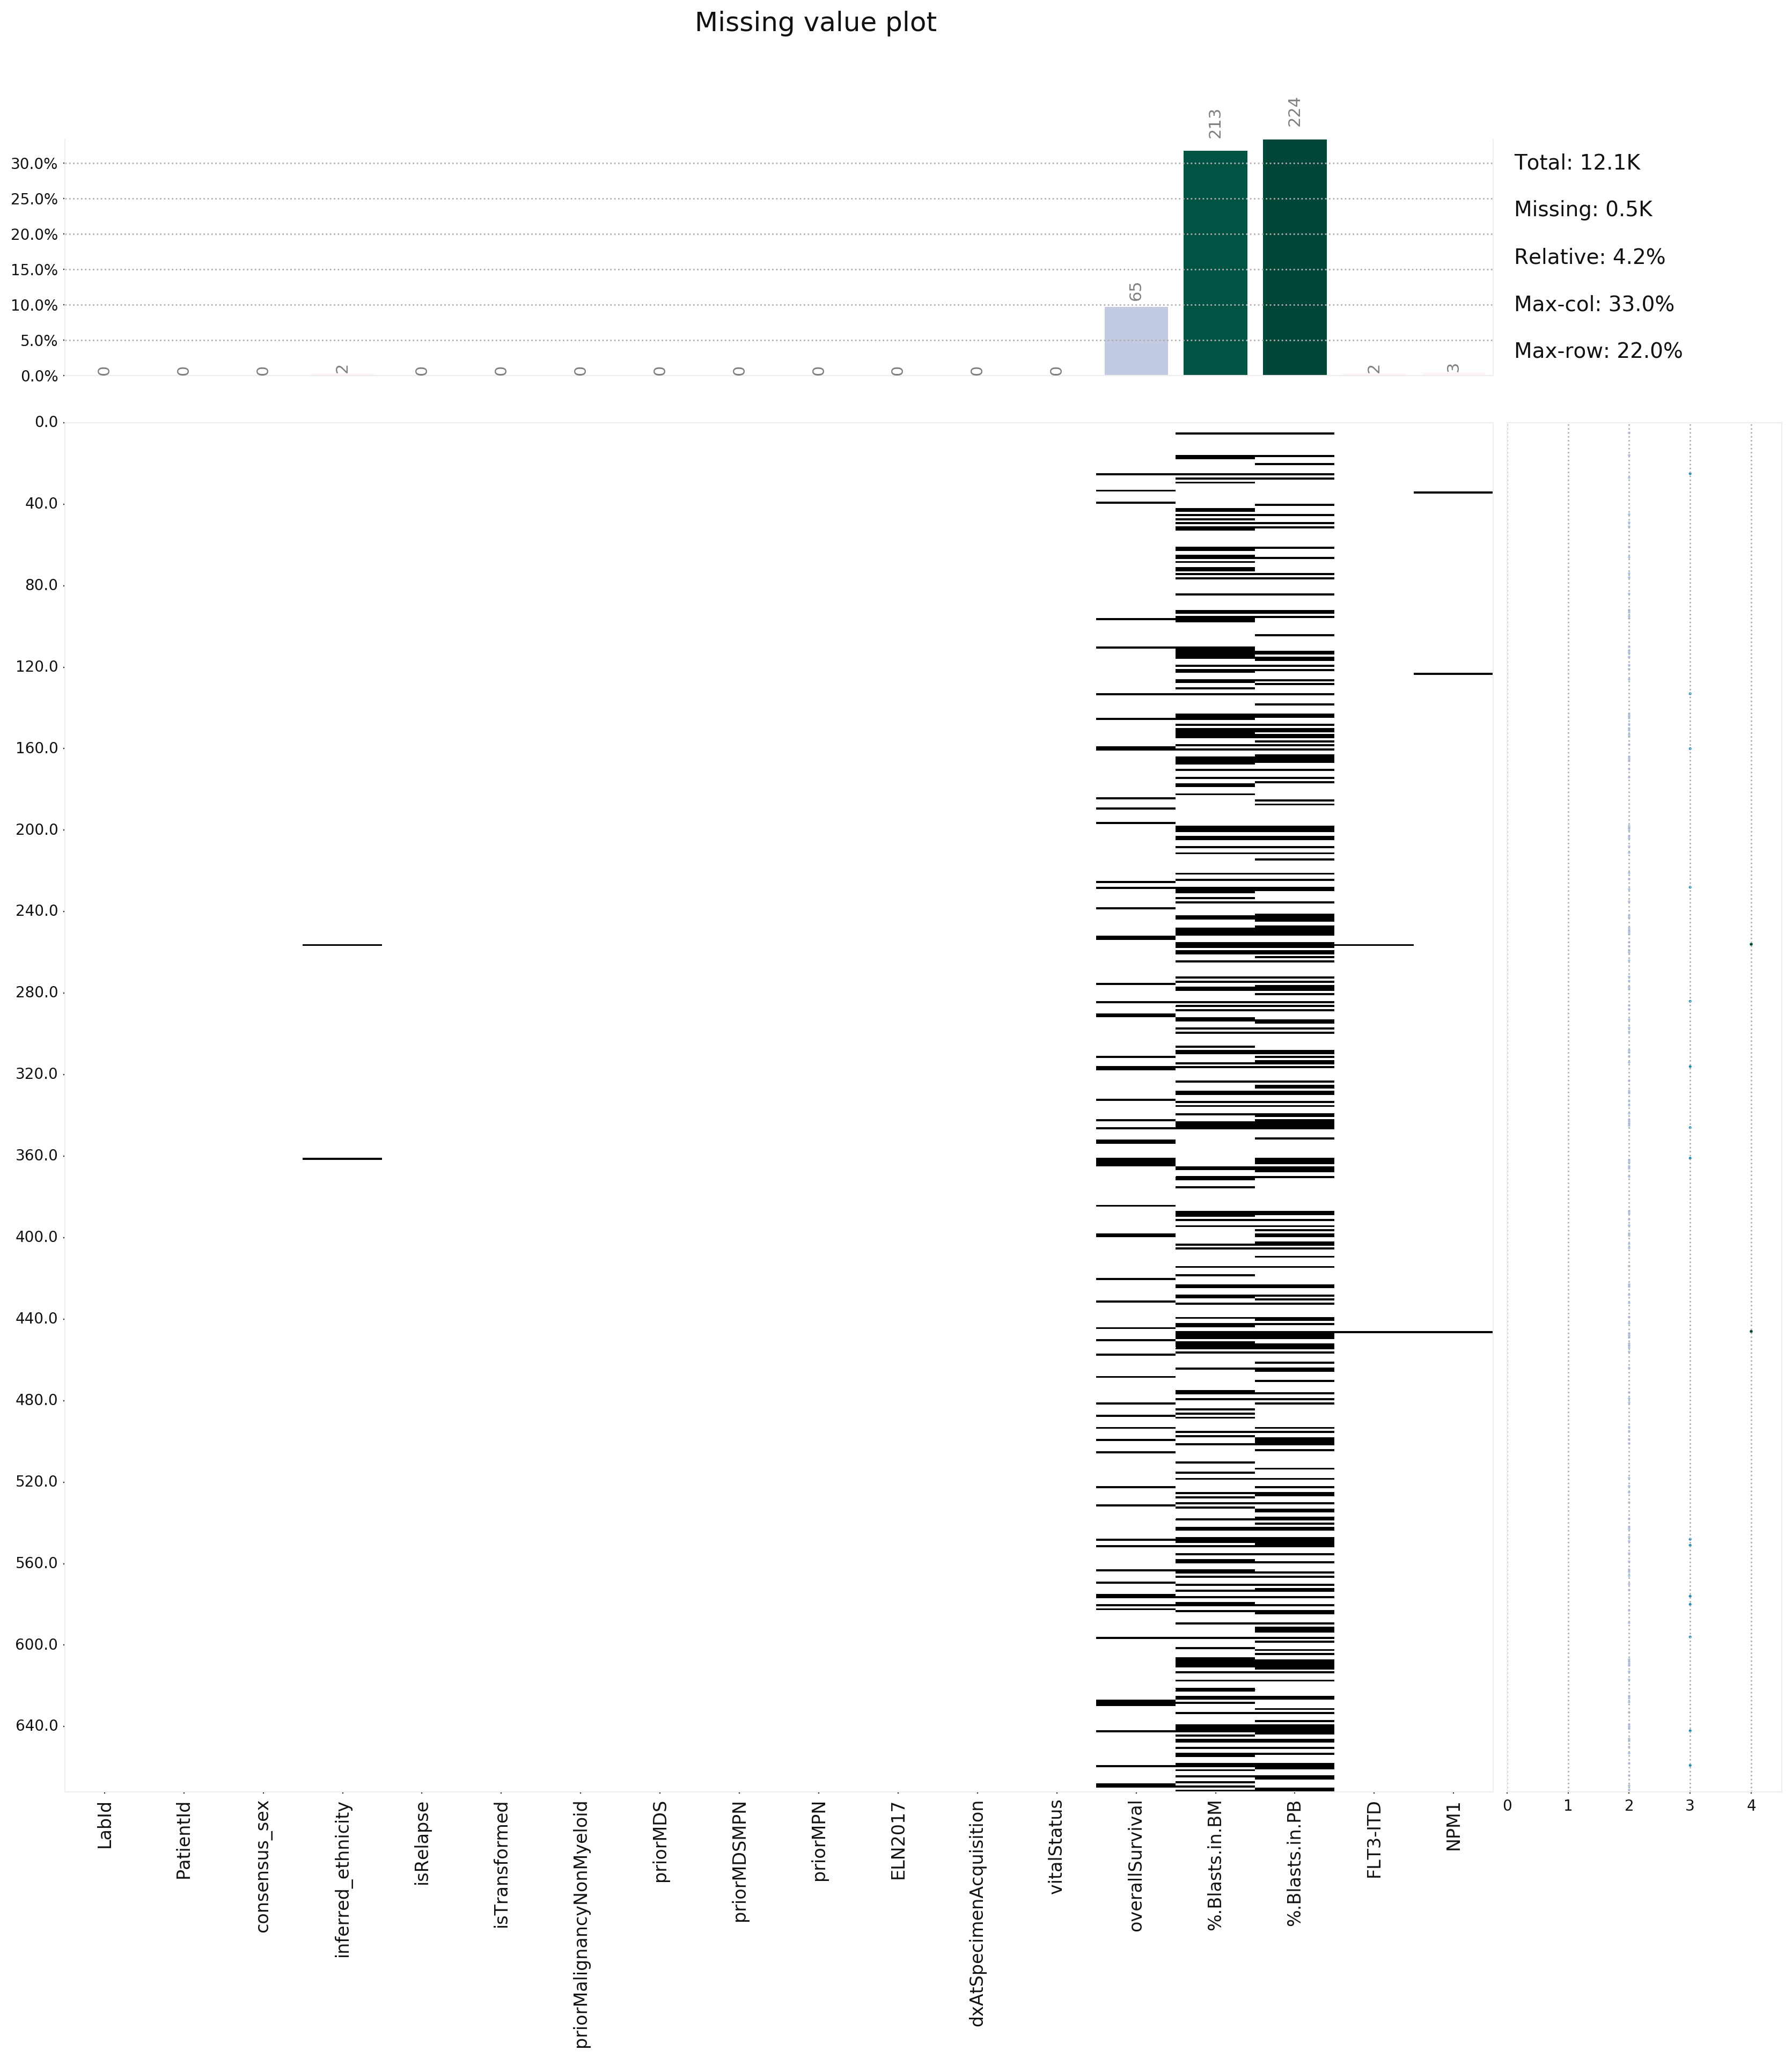

In [781]:
#clsm_cut Identify Missing Value
klib.missingval_plot(clsm_cut)

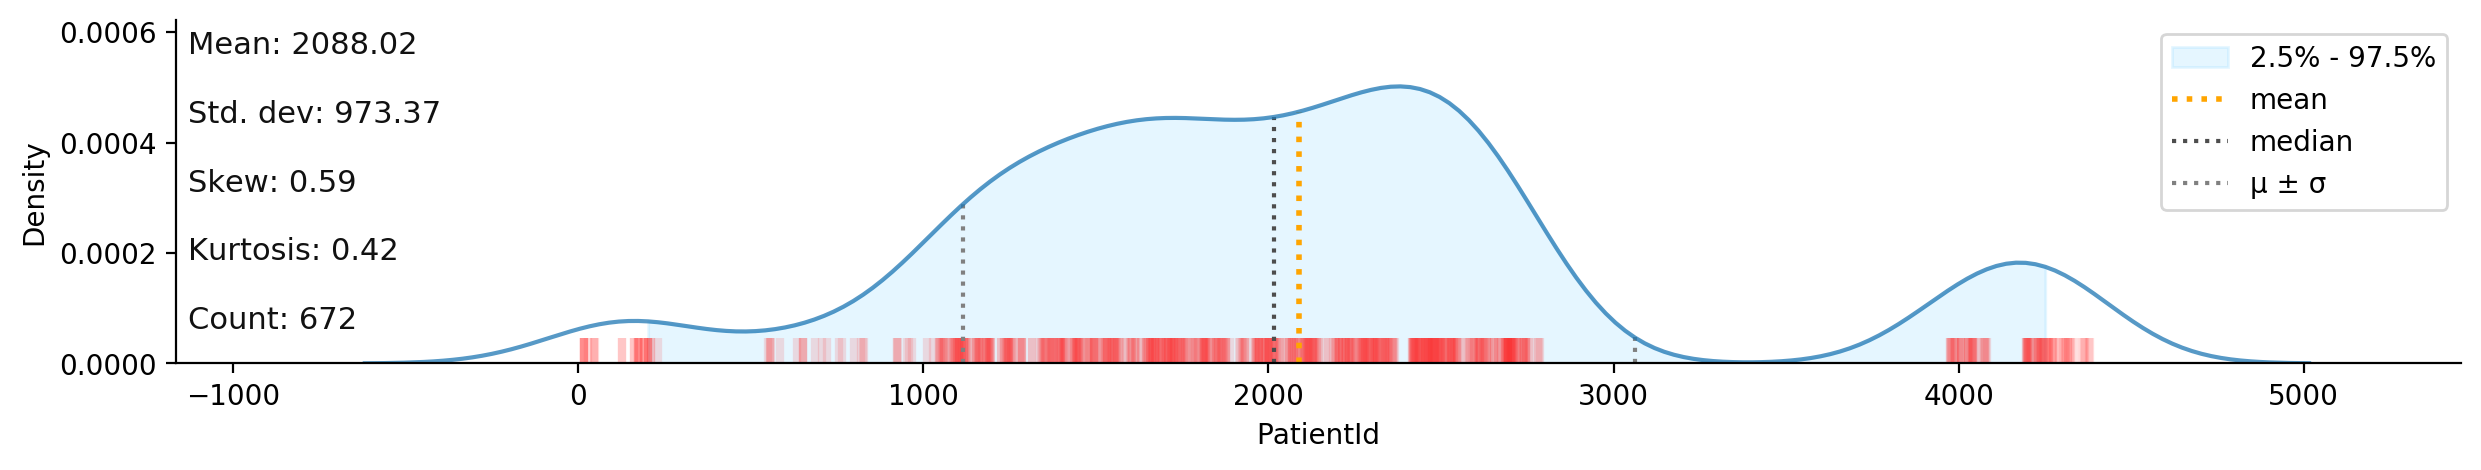

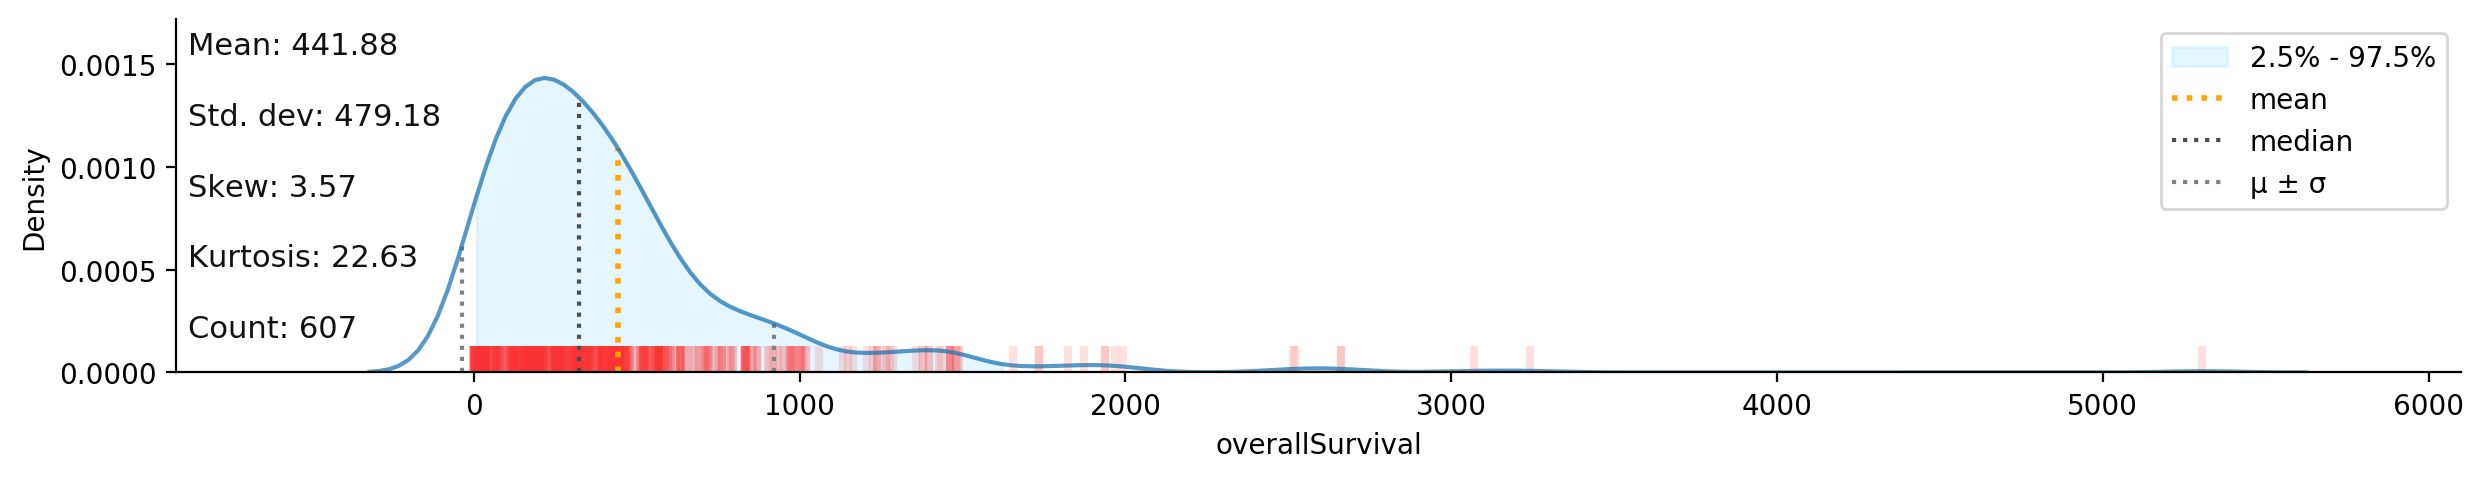

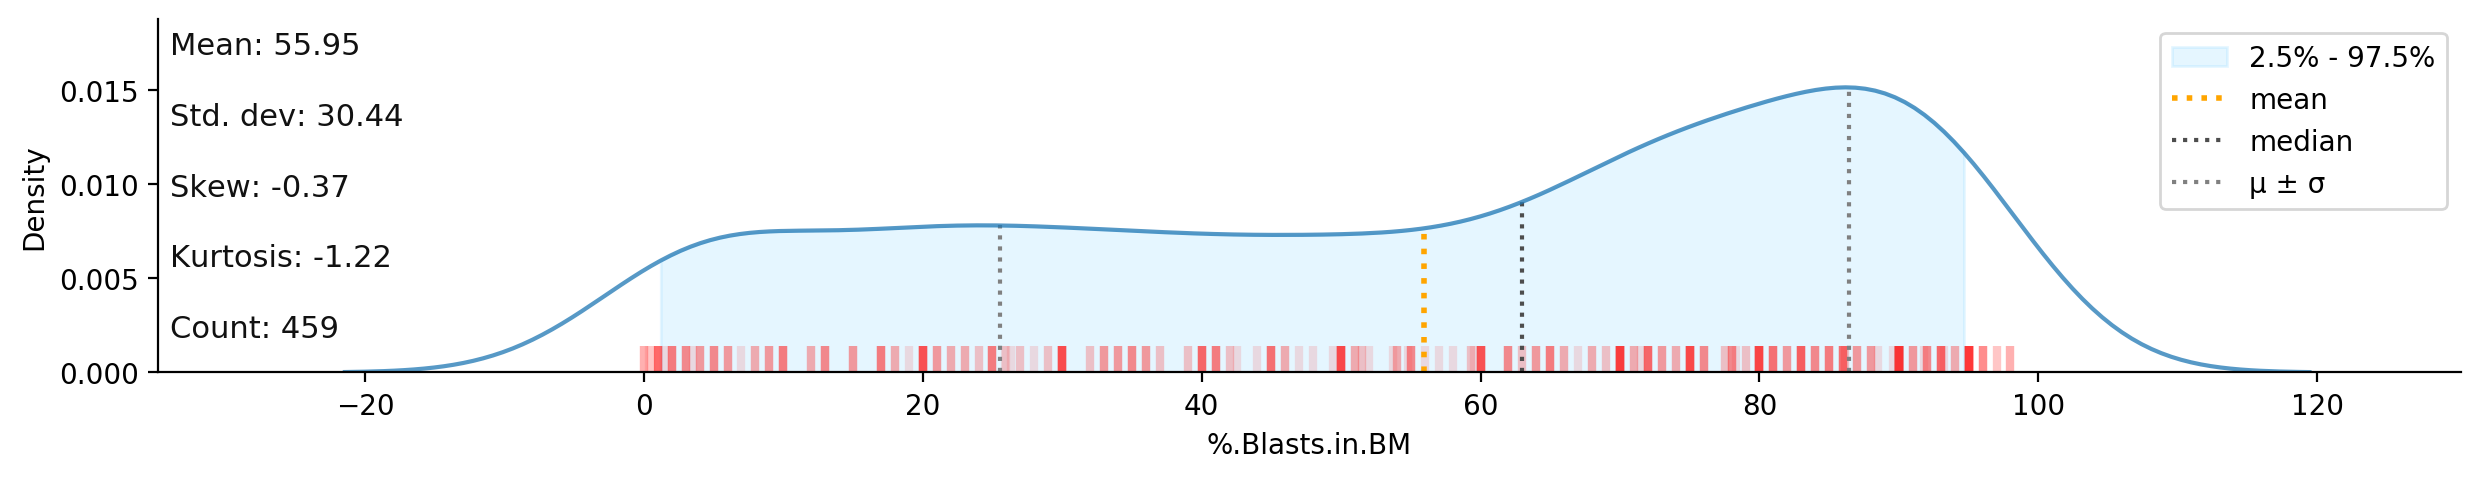

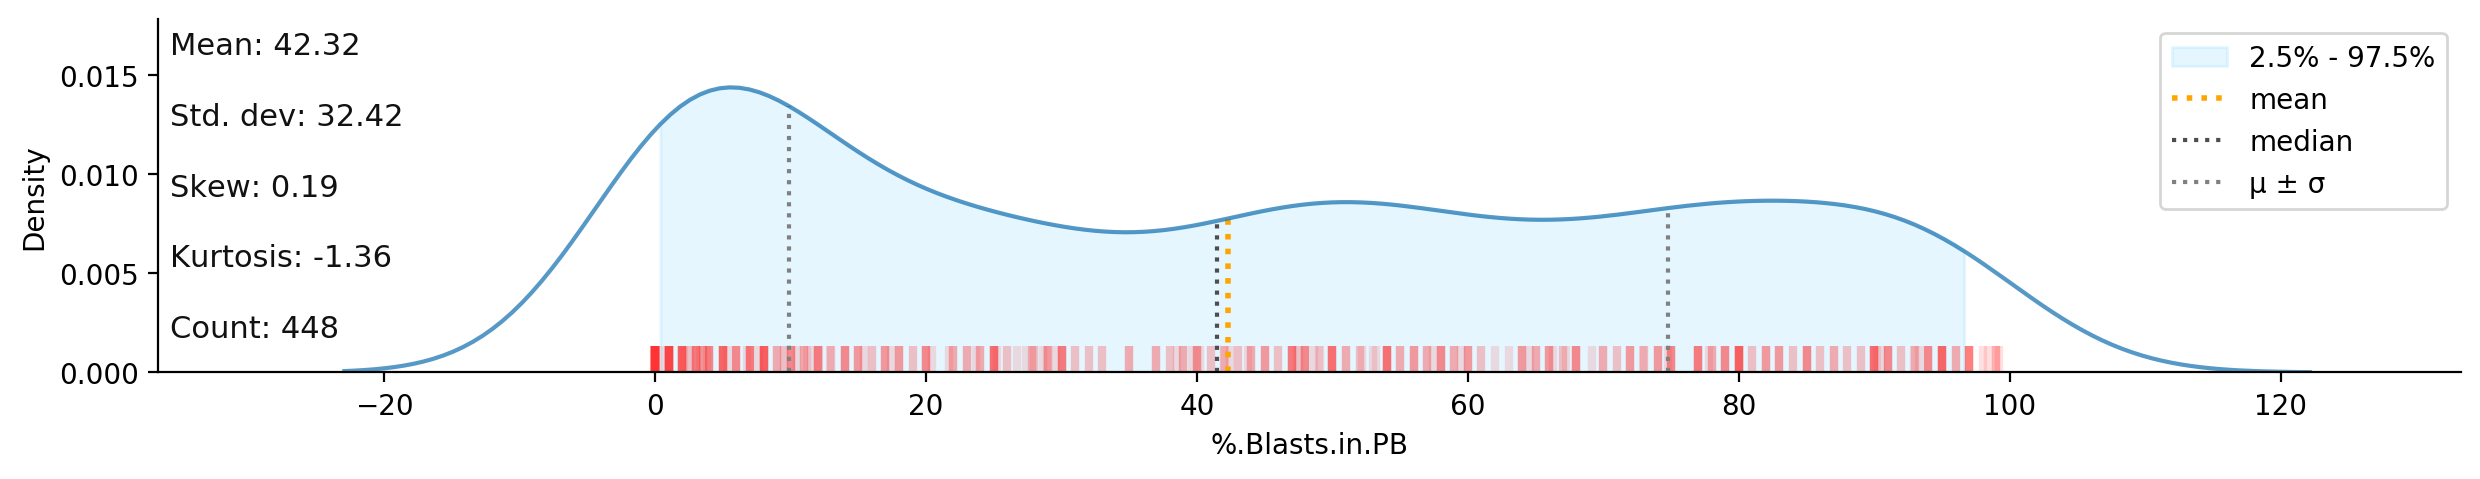

In [782]:
#Replace Missing Value
klib.dist_plot(clsm_cut)

In [783]:
clsm_cut.describe()

PatientId  overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB
count   672.000000       607.000000      459.000000      448.000000
mean   2088.020833       441.881384       55.949325       42.316629
std     973.372734       479.180429       30.440925       32.418249
min      17.000000        -1.000000        0.000000        0.000000
25%    1450.750000       167.000000       30.000000       10.000000
50%    2016.000000       323.000000       63.000000       41.500000
75%    2501.500000       555.000000       83.000000       72.000000
max    4380.000000      5305.000000       98.000000       99.200000

In [784]:
#From distibution, skewness suggest median is the best representation. 
clsm_cut['overallSurvival'] = clsm_cut['overallSurvival'].fillna(clsm_cut['overallSurvival'].median())
clsm_cut['%.Blasts.in.BM'] = clsm_cut['%.Blasts.in.BM'].fillna(clsm_cut['%.Blasts.in.BM'].median())
clsm_cut['%.Blasts.in.PB'] = clsm_cut['%.Blasts.in.PB'].fillna(clsm_cut['%.Blasts.in.PB'].median())

In [785]:
#Replace categorical NaN with unknown
clsm_cut = clsm_cut.replace(np.nan, 'unknown', regex=True)

In [786]:
#Determine mode of inferred_ethnicity
clsm_cut['inferred_ethnicity'].mode()

0    White
dtype: object

In [787]:
#In inferred_ethnicity, replace mode of unknown to white:
clsm_cut['inferred_ethnicity'] = clsm_cut['inferred_ethnicity'].replace(['unknown'], 'white')

clsm_cut['inferred_ethnicity'].unique()

array(['White', 'HispNative', 'AdmixedBlack', 'Asian', 'Black',
       'AdmixedAsian', 'white', 'AdmixedWhite', 'AdmixedHispNative'],
      dtype=object)

In [788]:
#Determine mode of flt3-itd
clsm_cut['FLT3-ITD'].mode()

0    negative
dtype: object

In [789]:
#In flt3-itd, replace mode of unknown to negative:
clsm_cut['FLT3-ITD'] = clsm_cut['FLT3-ITD'].replace(['unknown'], 'negative')
clsm_cut['FLT3-ITD'].unique()

array(['positive', 'negative'], dtype=object)

In [790]:
clsm_cut['NPM1'].mode()

0    negative
dtype: object

In [791]:
#In npm1, replace mode of unknown to negative:
clsm_cut['NPM1'] = clsm_cut['NPM1'].replace(['unknown'], 'negative')
clsm_cut['NPM1'].unique()

array(['positive', 'negative'], dtype=object)

In [792]:
#Check for missing values
klib.missingval_plot(clsm_cut)

No missing values found in the dataset.


In [793]:
clsm_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LabId                      672 non-null    object 
 1   PatientId                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         672 non-null    object 
 4   isRelapse                  672 non-null    bool   
 5   isTransformed              672 non-null    bool   
 6   priorMalignancyNonMyeloid  672 non-null    object 
 7   priorMDS                   672 non-null    object 
 8   priorMDSMPN                672 non-null    object 
 9   priorMPN                   672 non-null    object 
 10  ELN2017                    672 non-null    object 
 11  dxAtSpecimenAcquisition    672 non-null    object 
 12  vitalStatus                672 non-null    object 
 13  overallSurvival            672 non-null    float64

In [794]:
#Remove duplicated columns
clsm_cut = clsm_cut.loc[:, ~clsm_cut.columns.duplicated()]

In [795]:
clsm_cut.duplicated().sum()

0

In [796]:
clsm_cut = clsm_cut.drop_duplicates(ignore_index=True)
clsm_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LabId                      672 non-null    object 
 1   PatientId                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         672 non-null    object 
 4   isRelapse                  672 non-null    bool   
 5   isTransformed              672 non-null    bool   
 6   priorMalignancyNonMyeloid  672 non-null    object 
 7   priorMDS                   672 non-null    object 
 8   priorMDSMPN                672 non-null    object 
 9   priorMPN                   672 non-null    object 
 10  ELN2017                    672 non-null    object 
 11  dxAtSpecimenAcquisition    672 non-null    object 
 12  vitalStatus                672 non-null    object 
 13  overallSurvival            672 non-null    float64

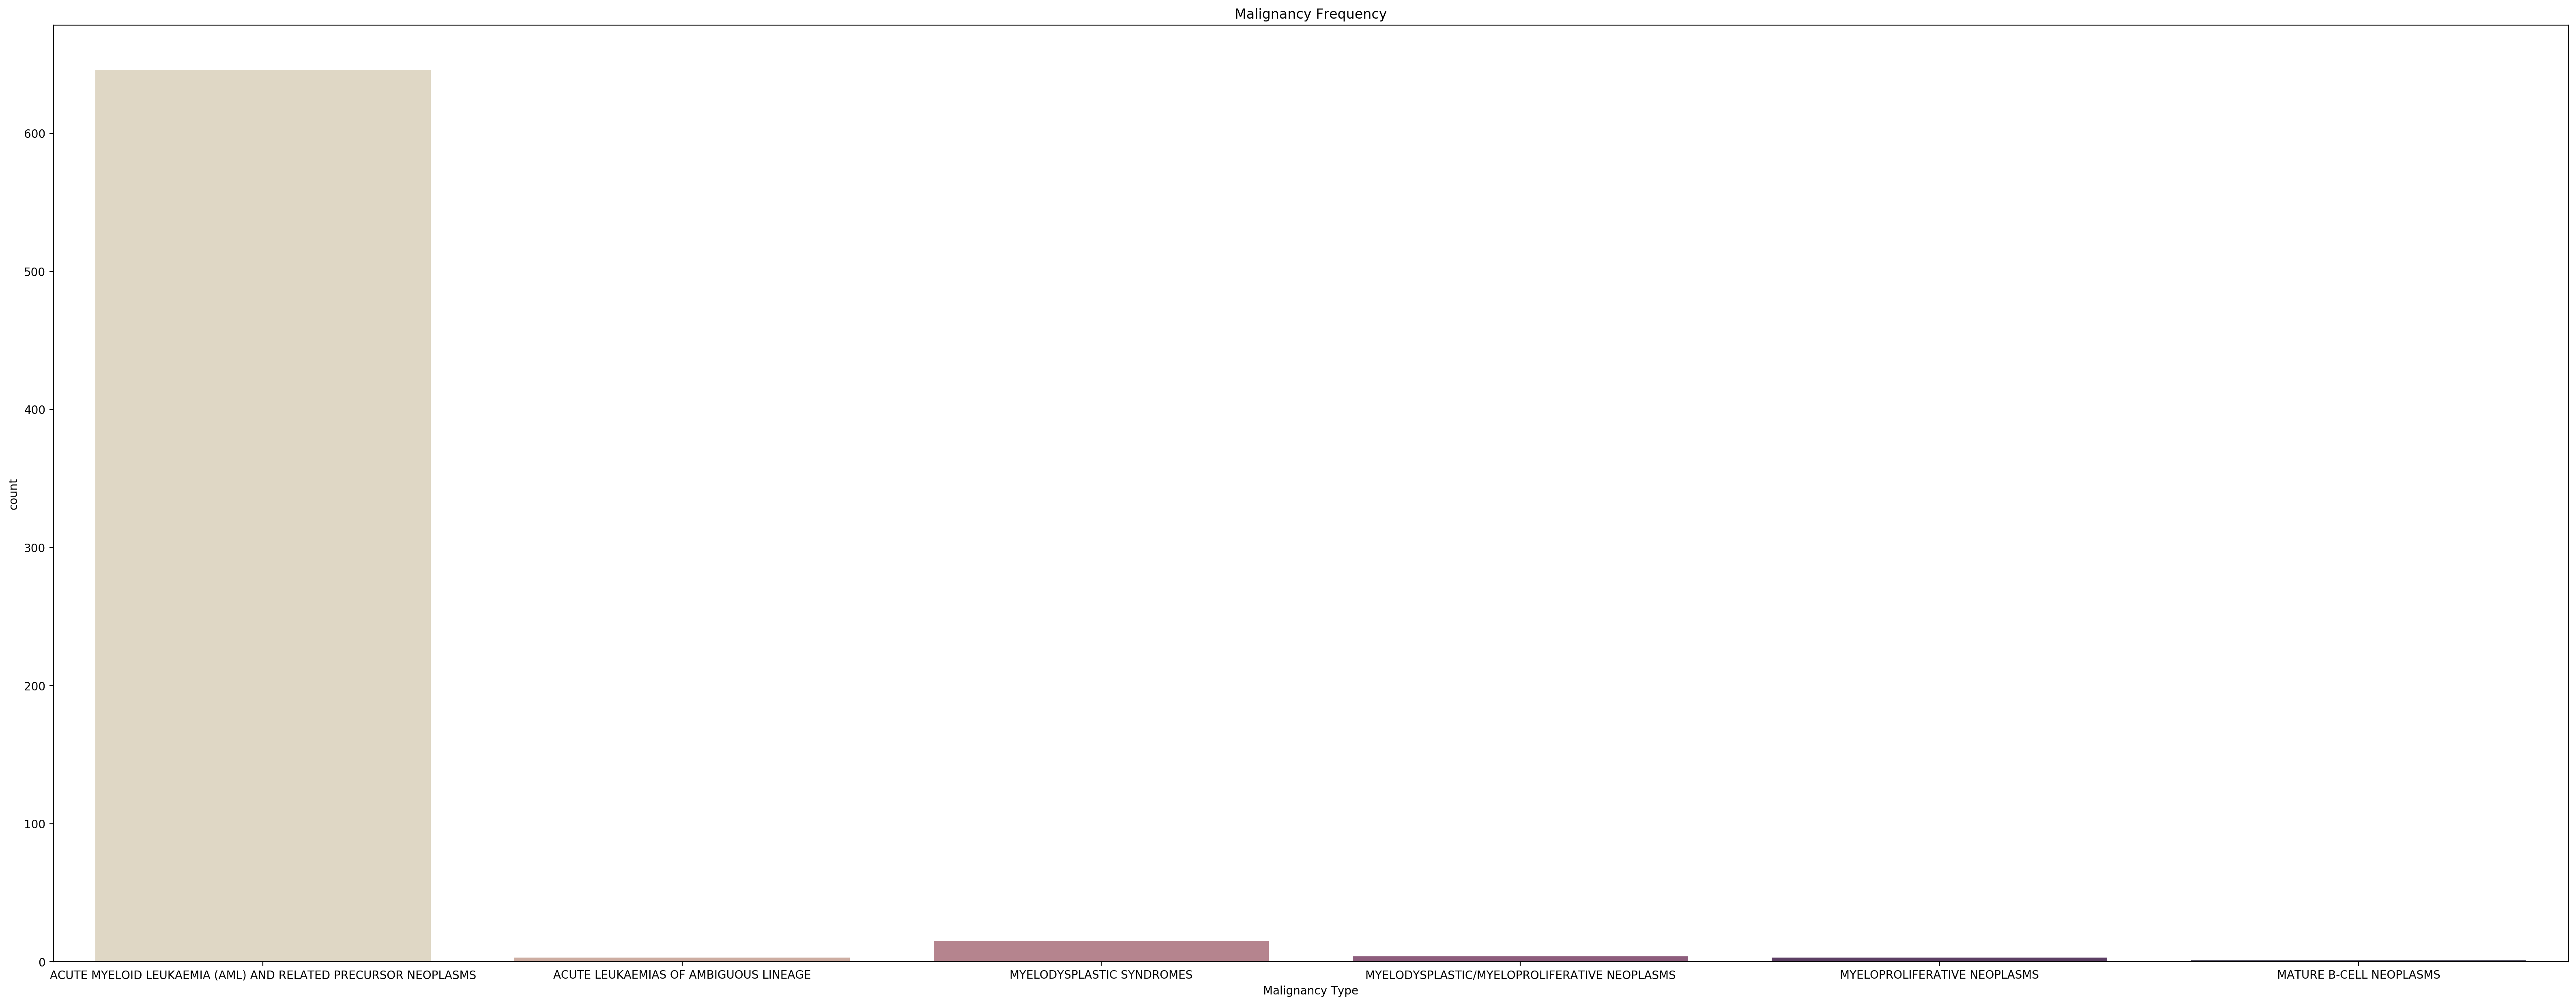

In [797]:
#Data Visualization - "dxAtSpecimenAcquisition
sns.countplot(x=clsm_cut["dxAtSpecimenAcquisition"], palette = "ch:s=-.2,r=.6")
plt.xlabel('Malignancy Type')
plt.title('Malignancy Frequency')
plt.gcf().set_size_inches(40, 15)

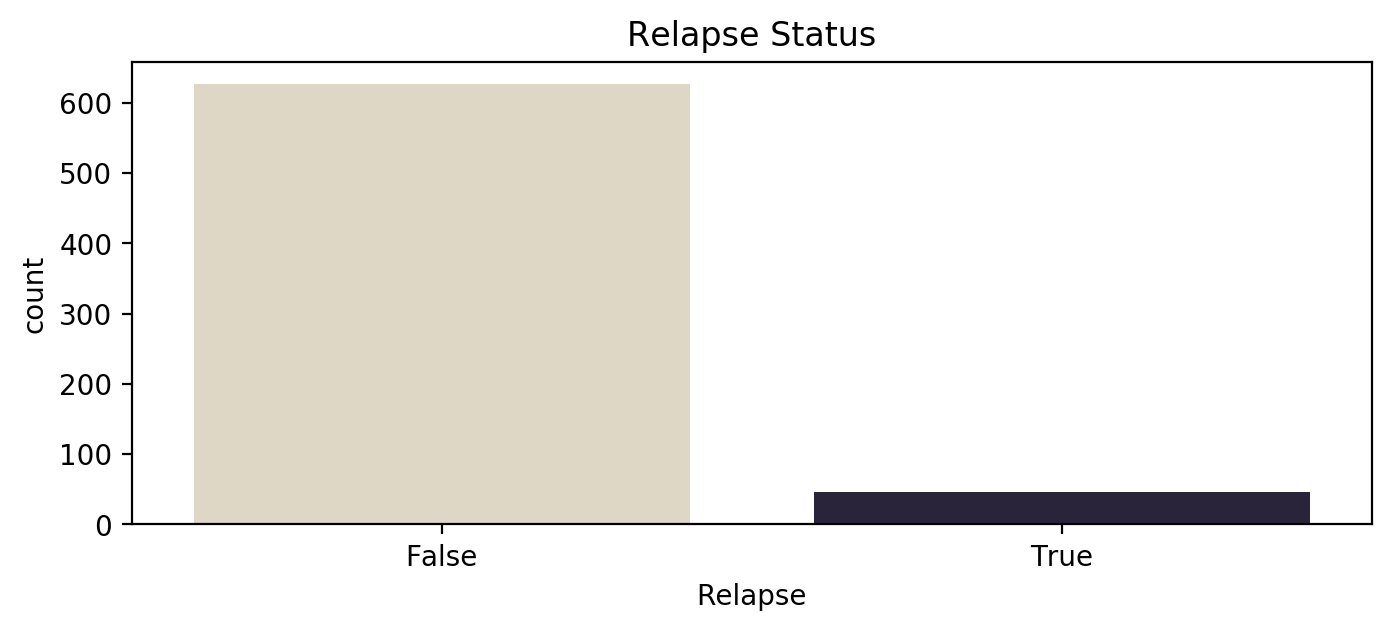

In [798]:
#Data Visualization - "isRelapse"
sns.countplot(x=clsm_cut["isRelapse"], palette = "ch:s=-.2,r=.6")
plt.xlabel('Relapse')
plt.title('Relapse Status')
plt.gcf().set_size_inches(8, 3)

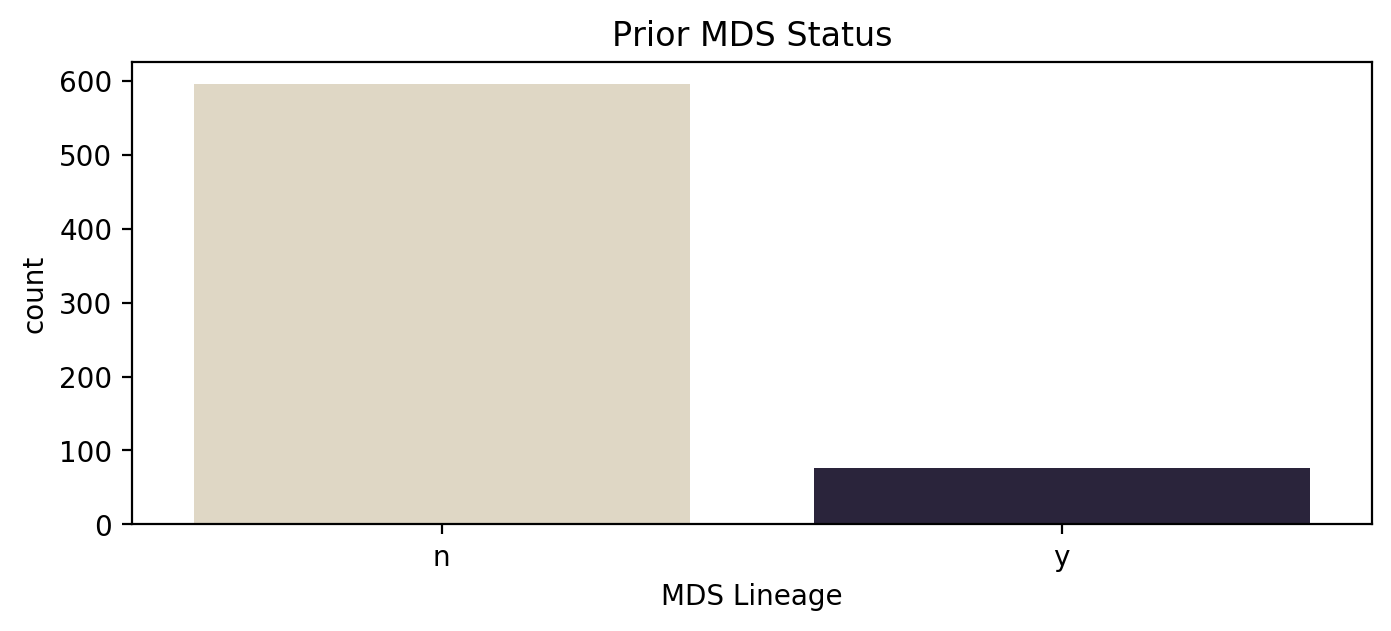

In [799]:
#Data Visualization - "priorMDS"
sns.countplot(x=clsm_cut["priorMDS"], palette = "ch:s=-.2,r=.6")
plt.xlabel('MDS Lineage')
plt.title('Prior MDS Status')
plt.gcf().set_size_inches(8, 3)

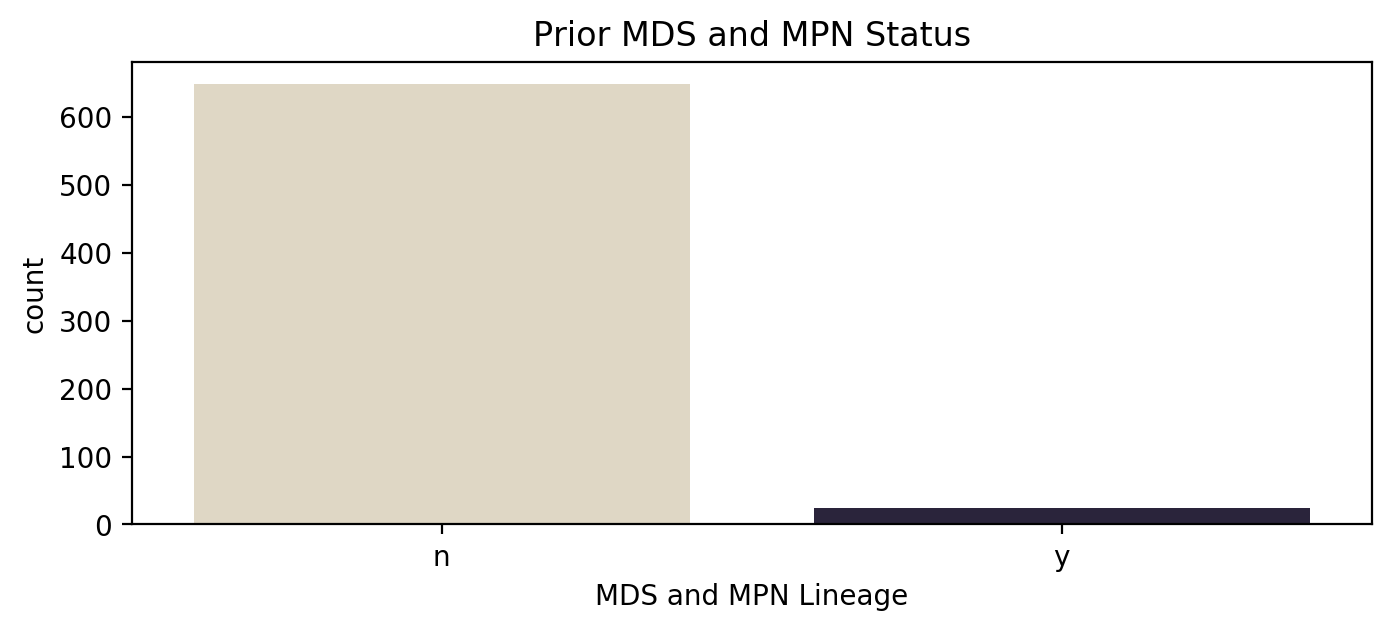

In [800]:
#Data Visualization - "priorMDSMPN"
sns.countplot(x=clsm_cut["priorMDSMPN"], palette = "ch:s=-.2,r=.6")
plt.xlabel('MDS and MPN Lineage')
plt.title('Prior MDS and MPN Status')
plt.gcf().set_size_inches(8, 3)

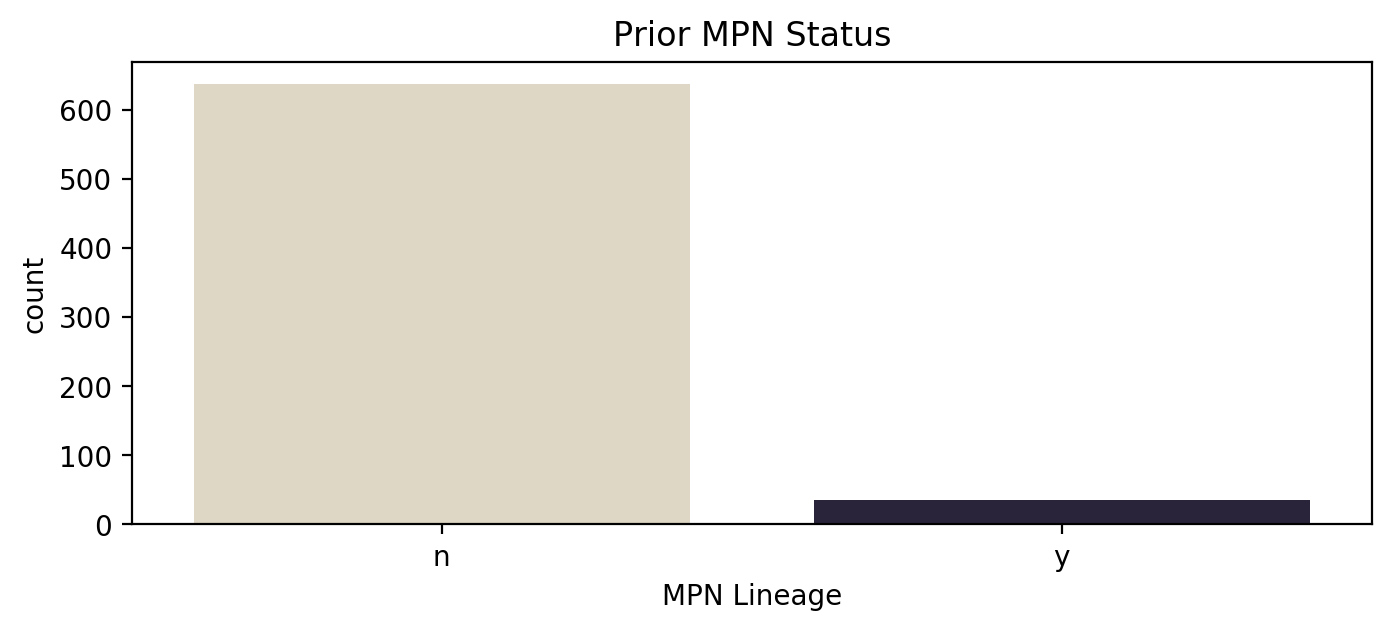

In [801]:
#Data Visualization - "priorMPN"
sns.countplot(x=clsm_cut["priorMPN"], palette = "ch:s=-.2,r=.6")
plt.xlabel('MPN Lineage')
plt.title('Prior MPN Status')
plt.gcf().set_size_inches(8, 3)

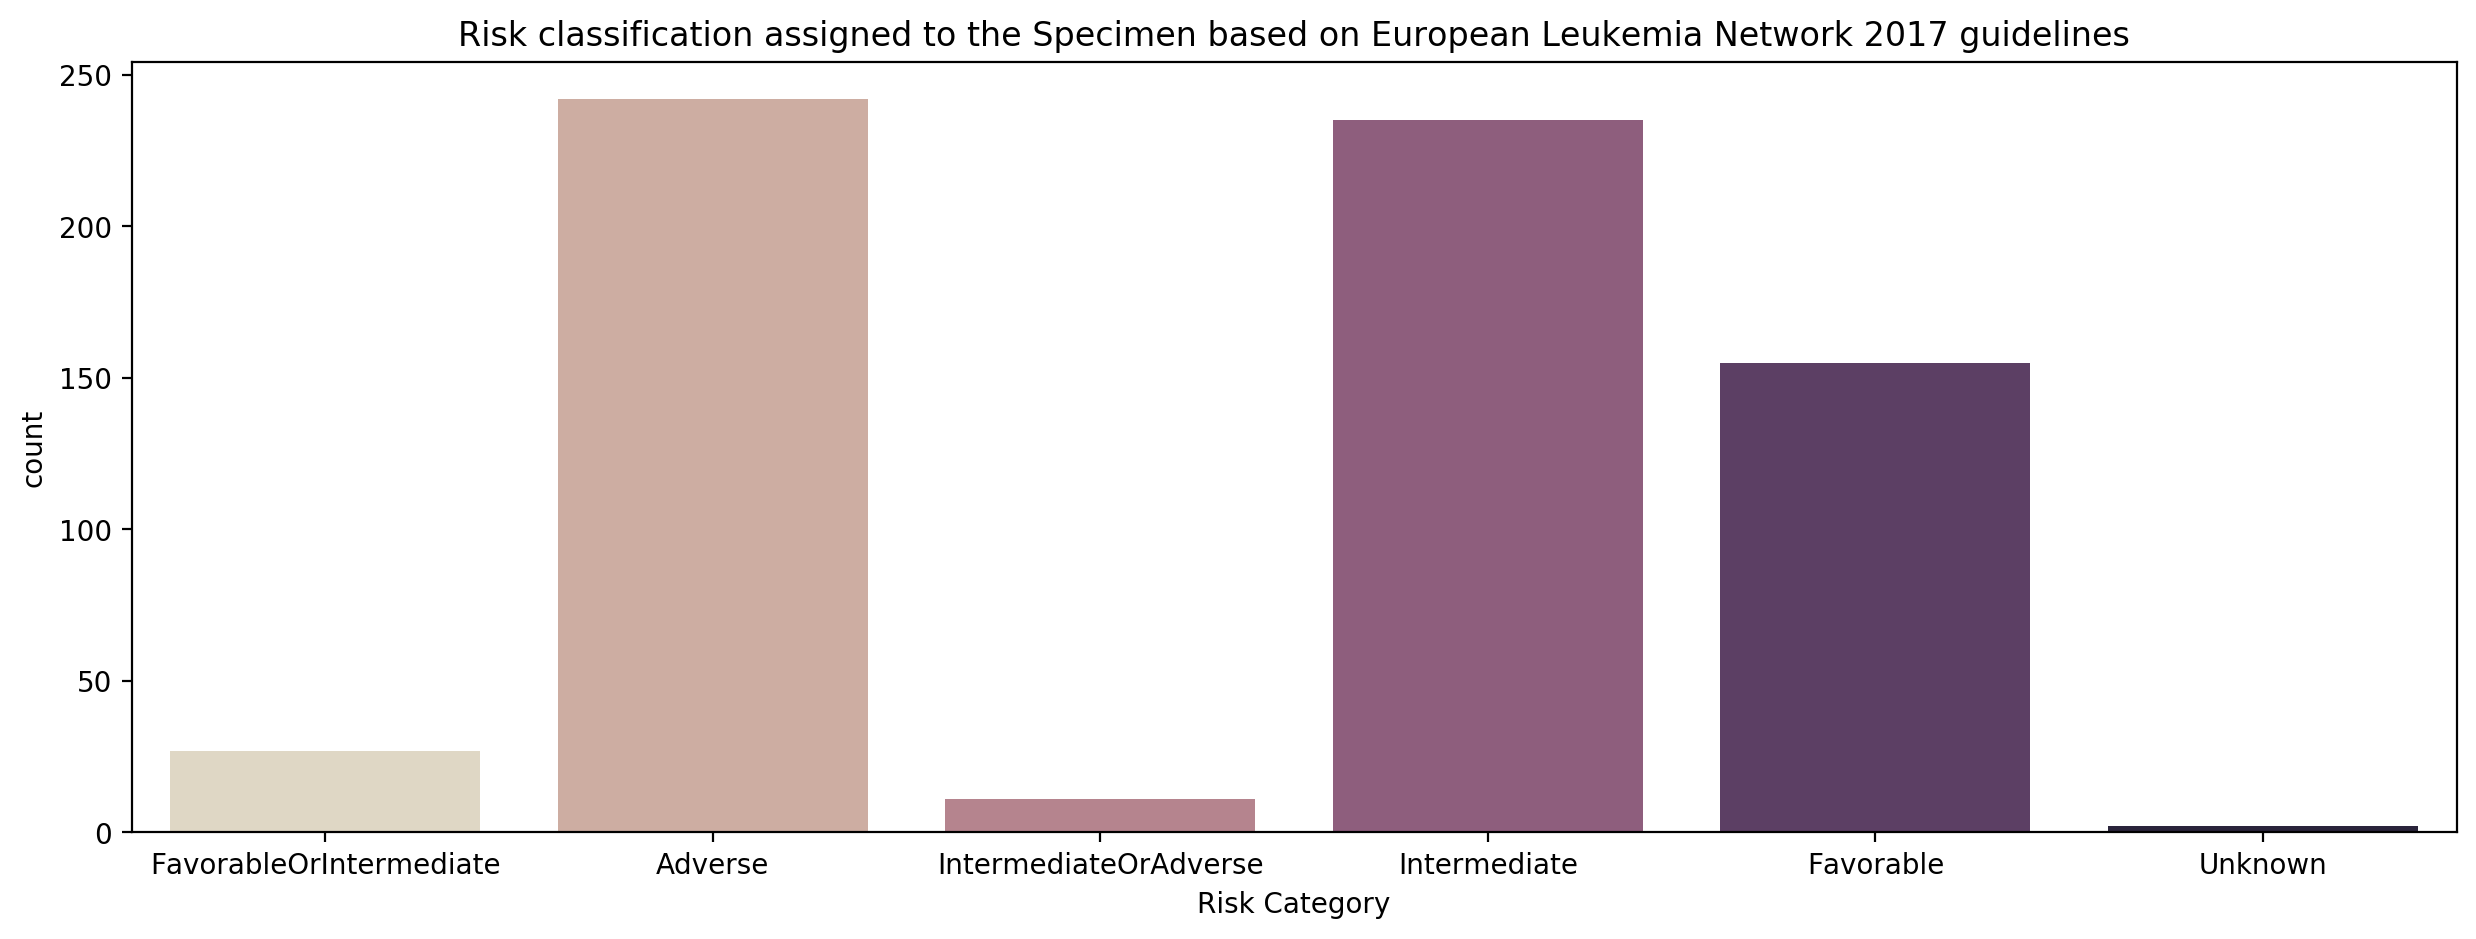

In [802]:
#Data Visualization - "ELN2017"
sns.countplot(x=clsm_cut["ELN2017"], palette = "ch:s=-.2,r=.6")
plt.xlabel('Risk Category')
plt.title('Risk classification assigned to the Specimen based on European Leukemia Network 2017 guidelines')
plt.gcf().set_size_inches(15, 5)

Text(0.5, 1.0, 'Survival Against NPM1 Mutation')

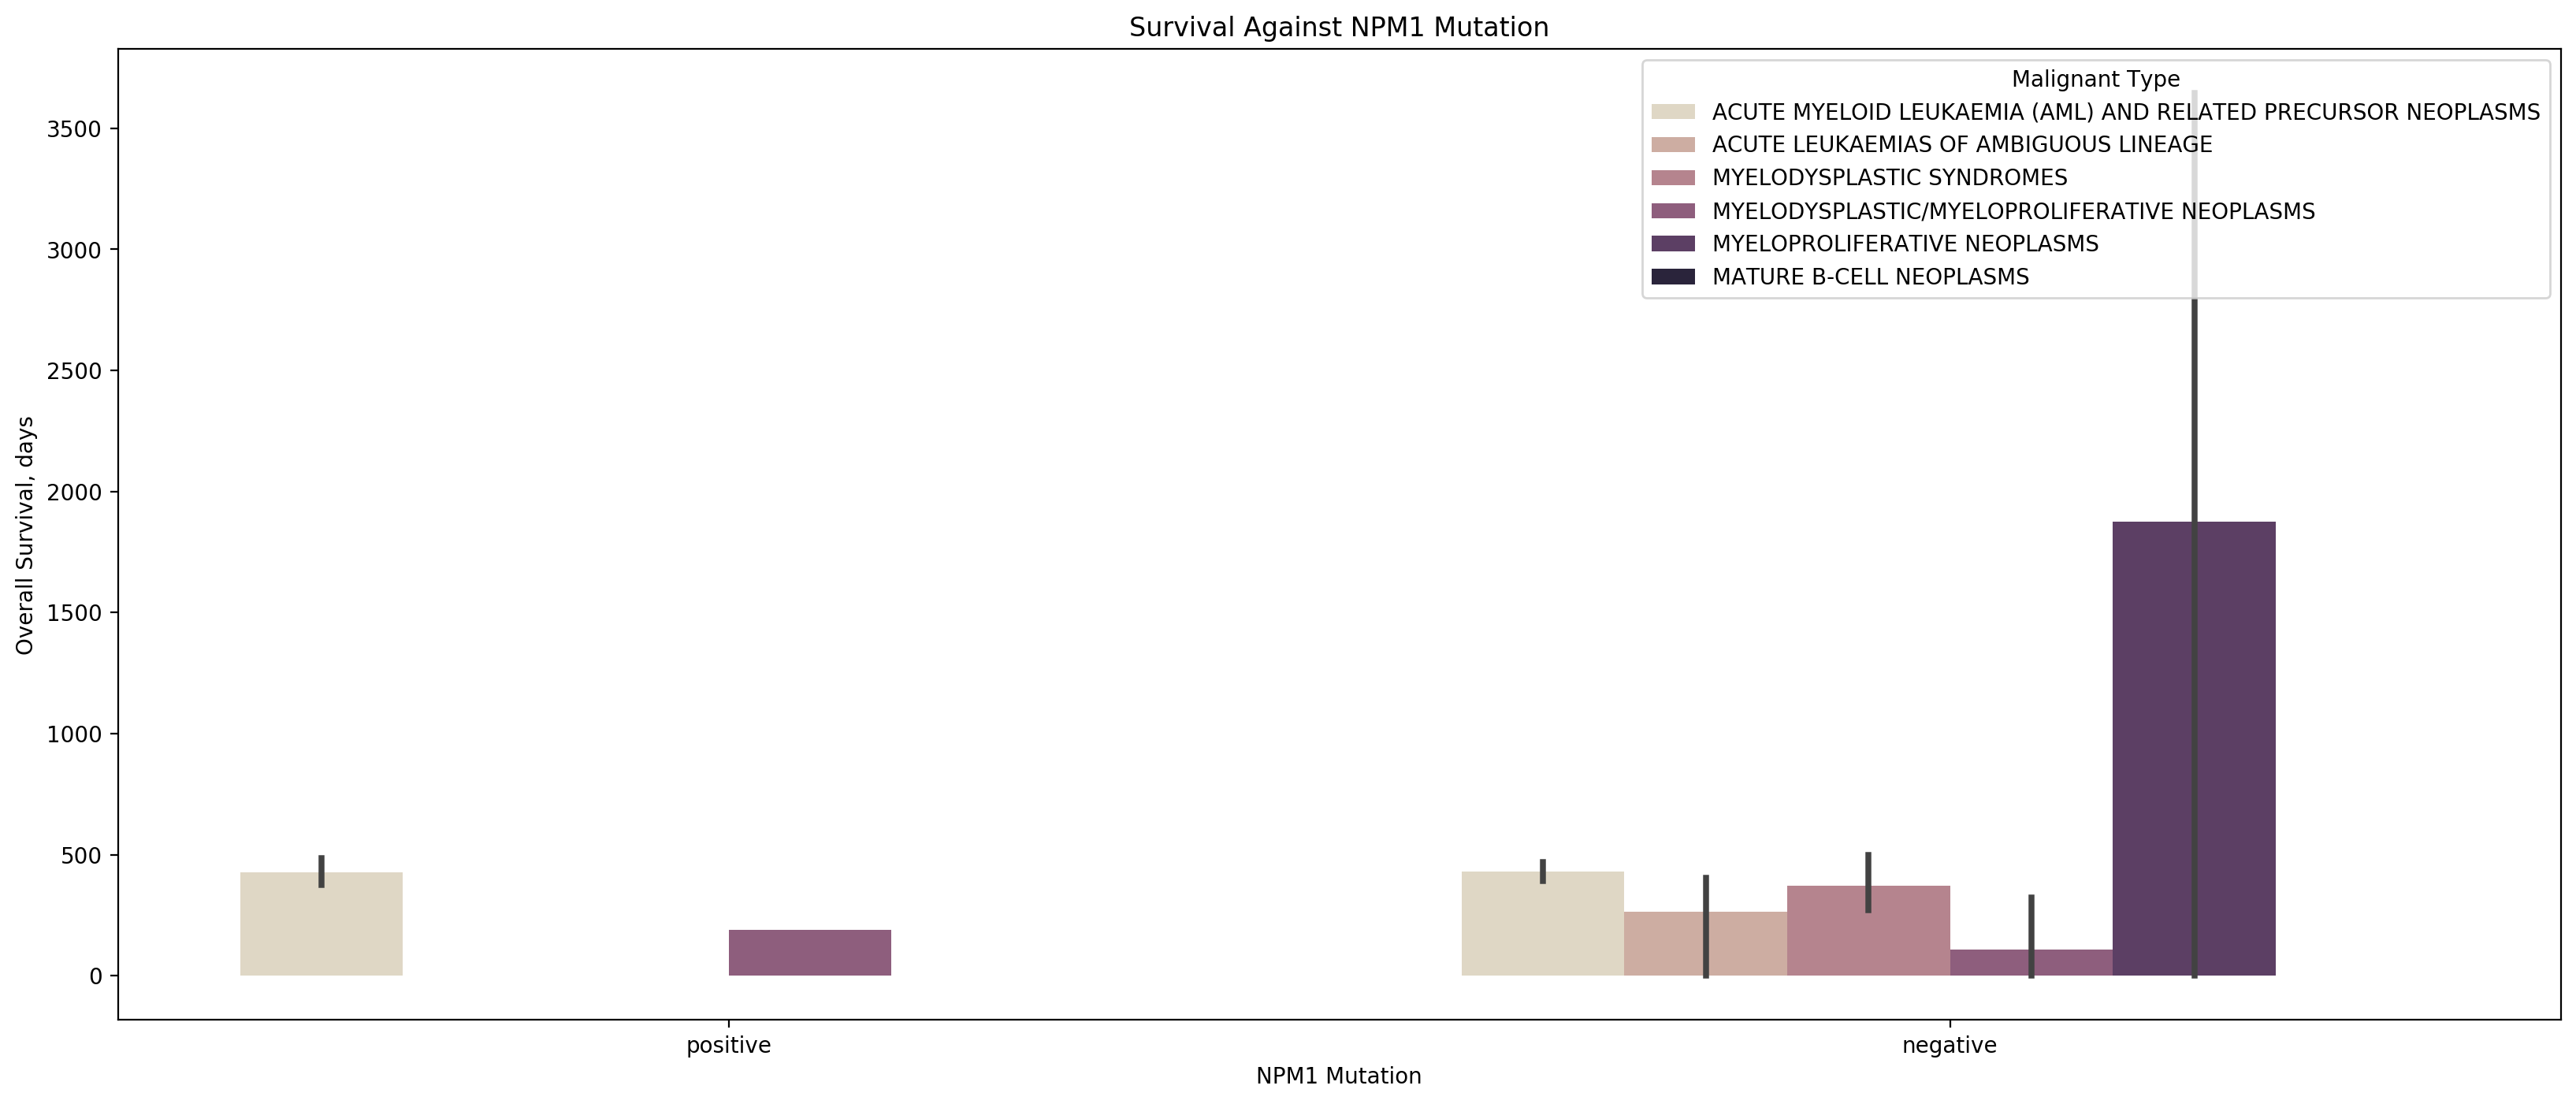

In [803]:
sns.barplot(data= clsm_cut,x = 'NPM1', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('NPM1 Mutation')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against NPM1 Mutation")

Text(0.5, 1.0, 'Survival Against FLT3-ITD Mutation')

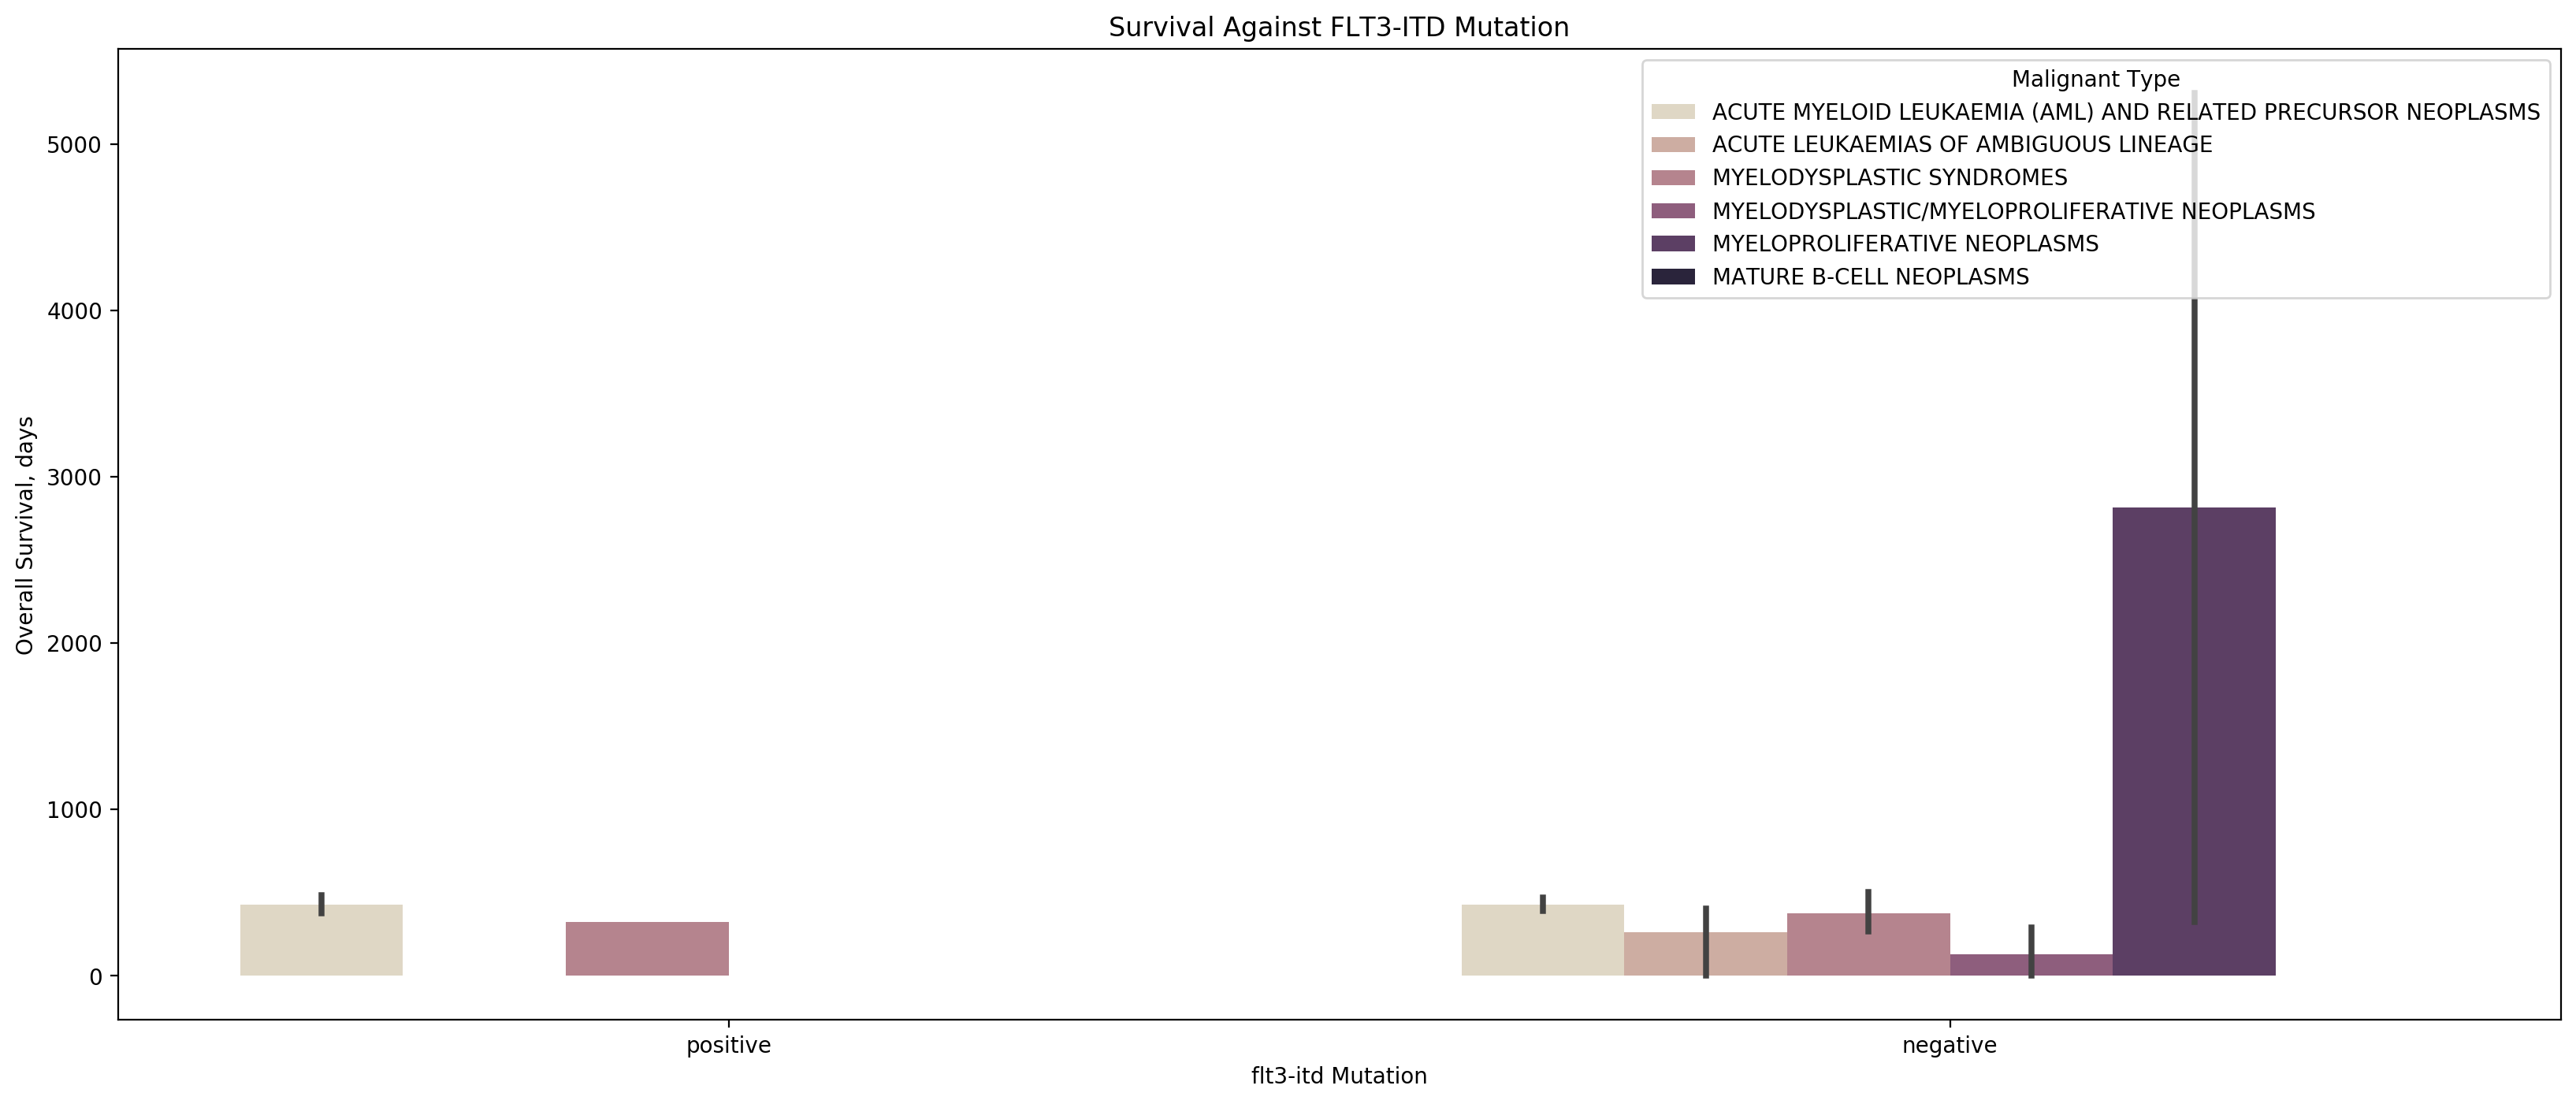

In [804]:
sns.barplot(data= clsm_cut,x = 'FLT3-ITD', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('flt3-itd Mutation')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against FLT3-ITD Mutation")

Text(0.5, 1.0, 'Survival Against Risk classification assigned to the Specimen based on European Leukemia Network 2017 guidelines')

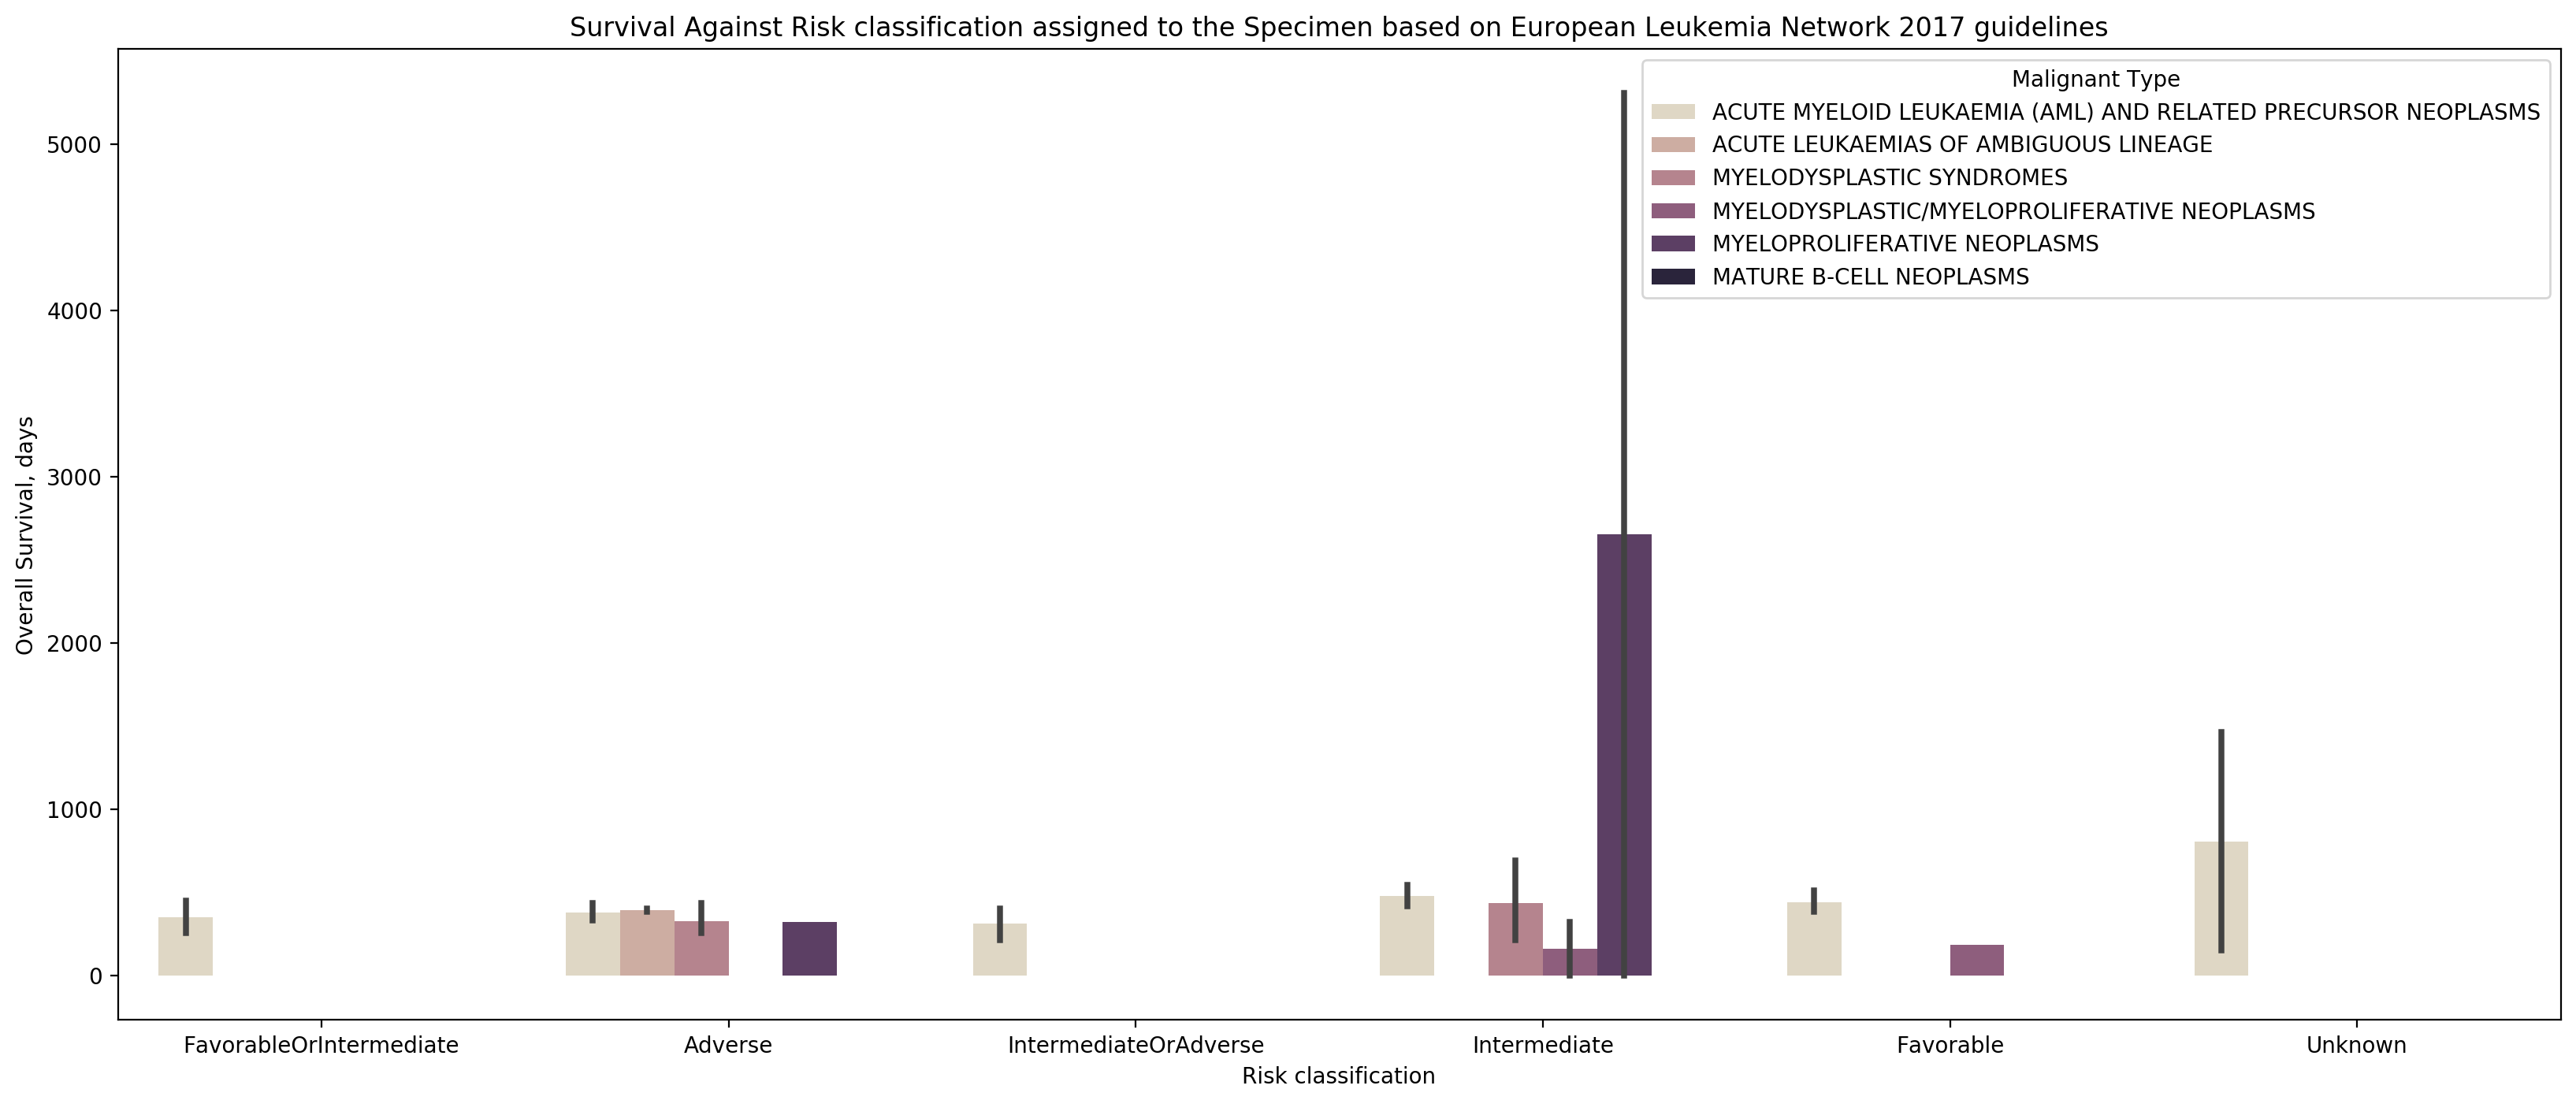

In [805]:
sns.barplot(data= clsm_cut,x = 'ELN2017', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('Risk classification')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against Risk classification assigned to the Specimen based on European Leukemia Network 2017 guidelines")

Text(0.5, 1.0, 'Survival Against Prior MDS Diagnosis')

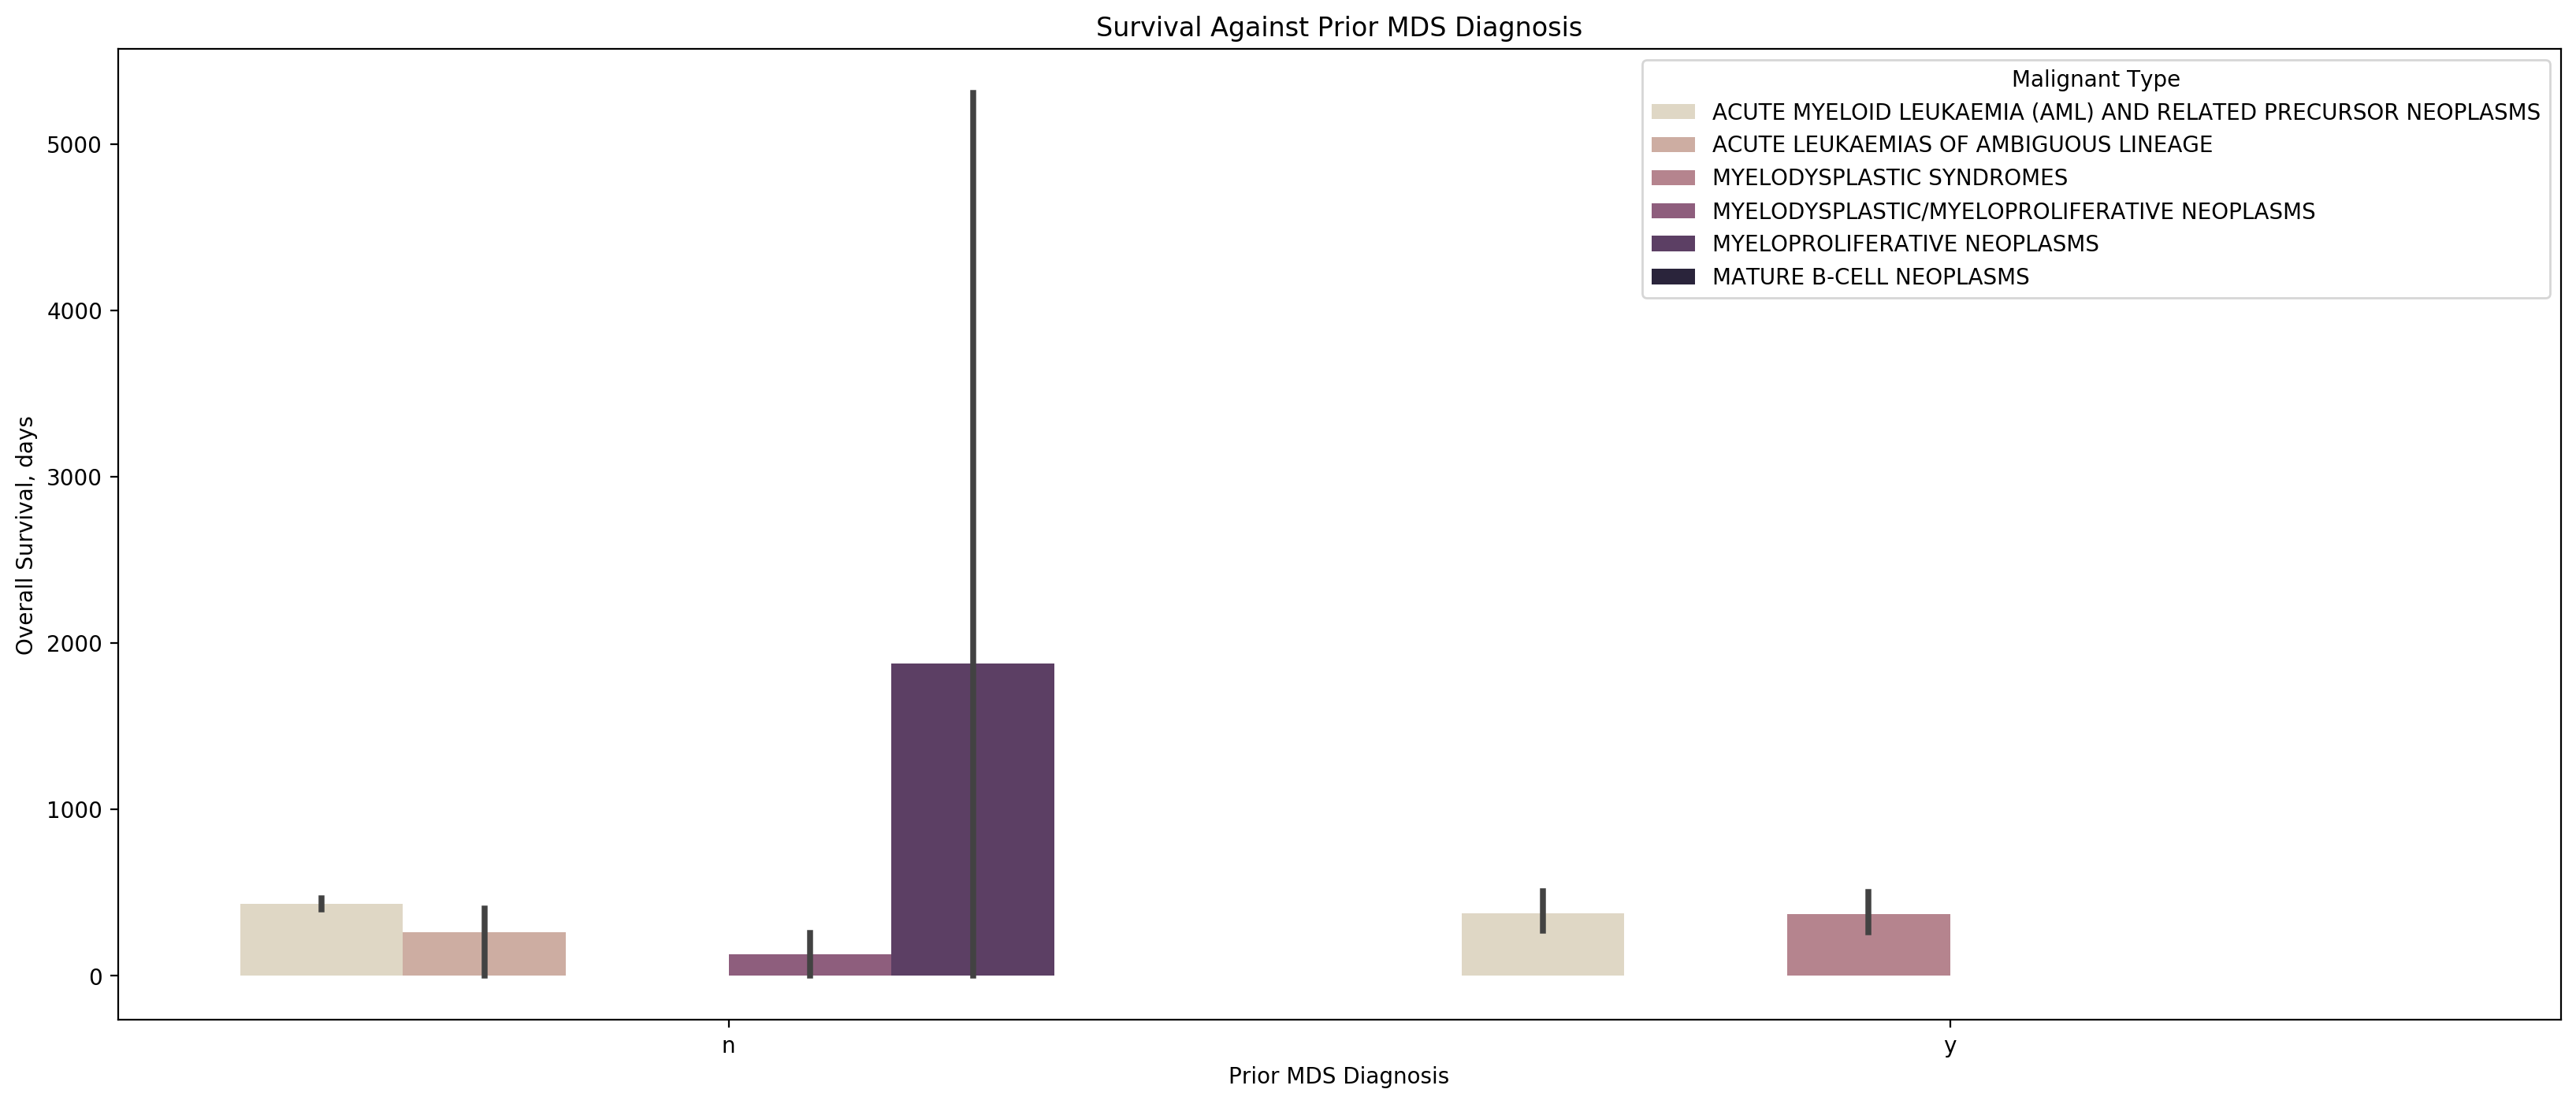

In [806]:
sns.barplot(data= clsm_cut,x = 'priorMDS', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('Prior MDS Diagnosis')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against Prior MDS Diagnosis")

Text(0.5, 1.0, 'Survival Against Prior MDS and MPN Diagnosis')

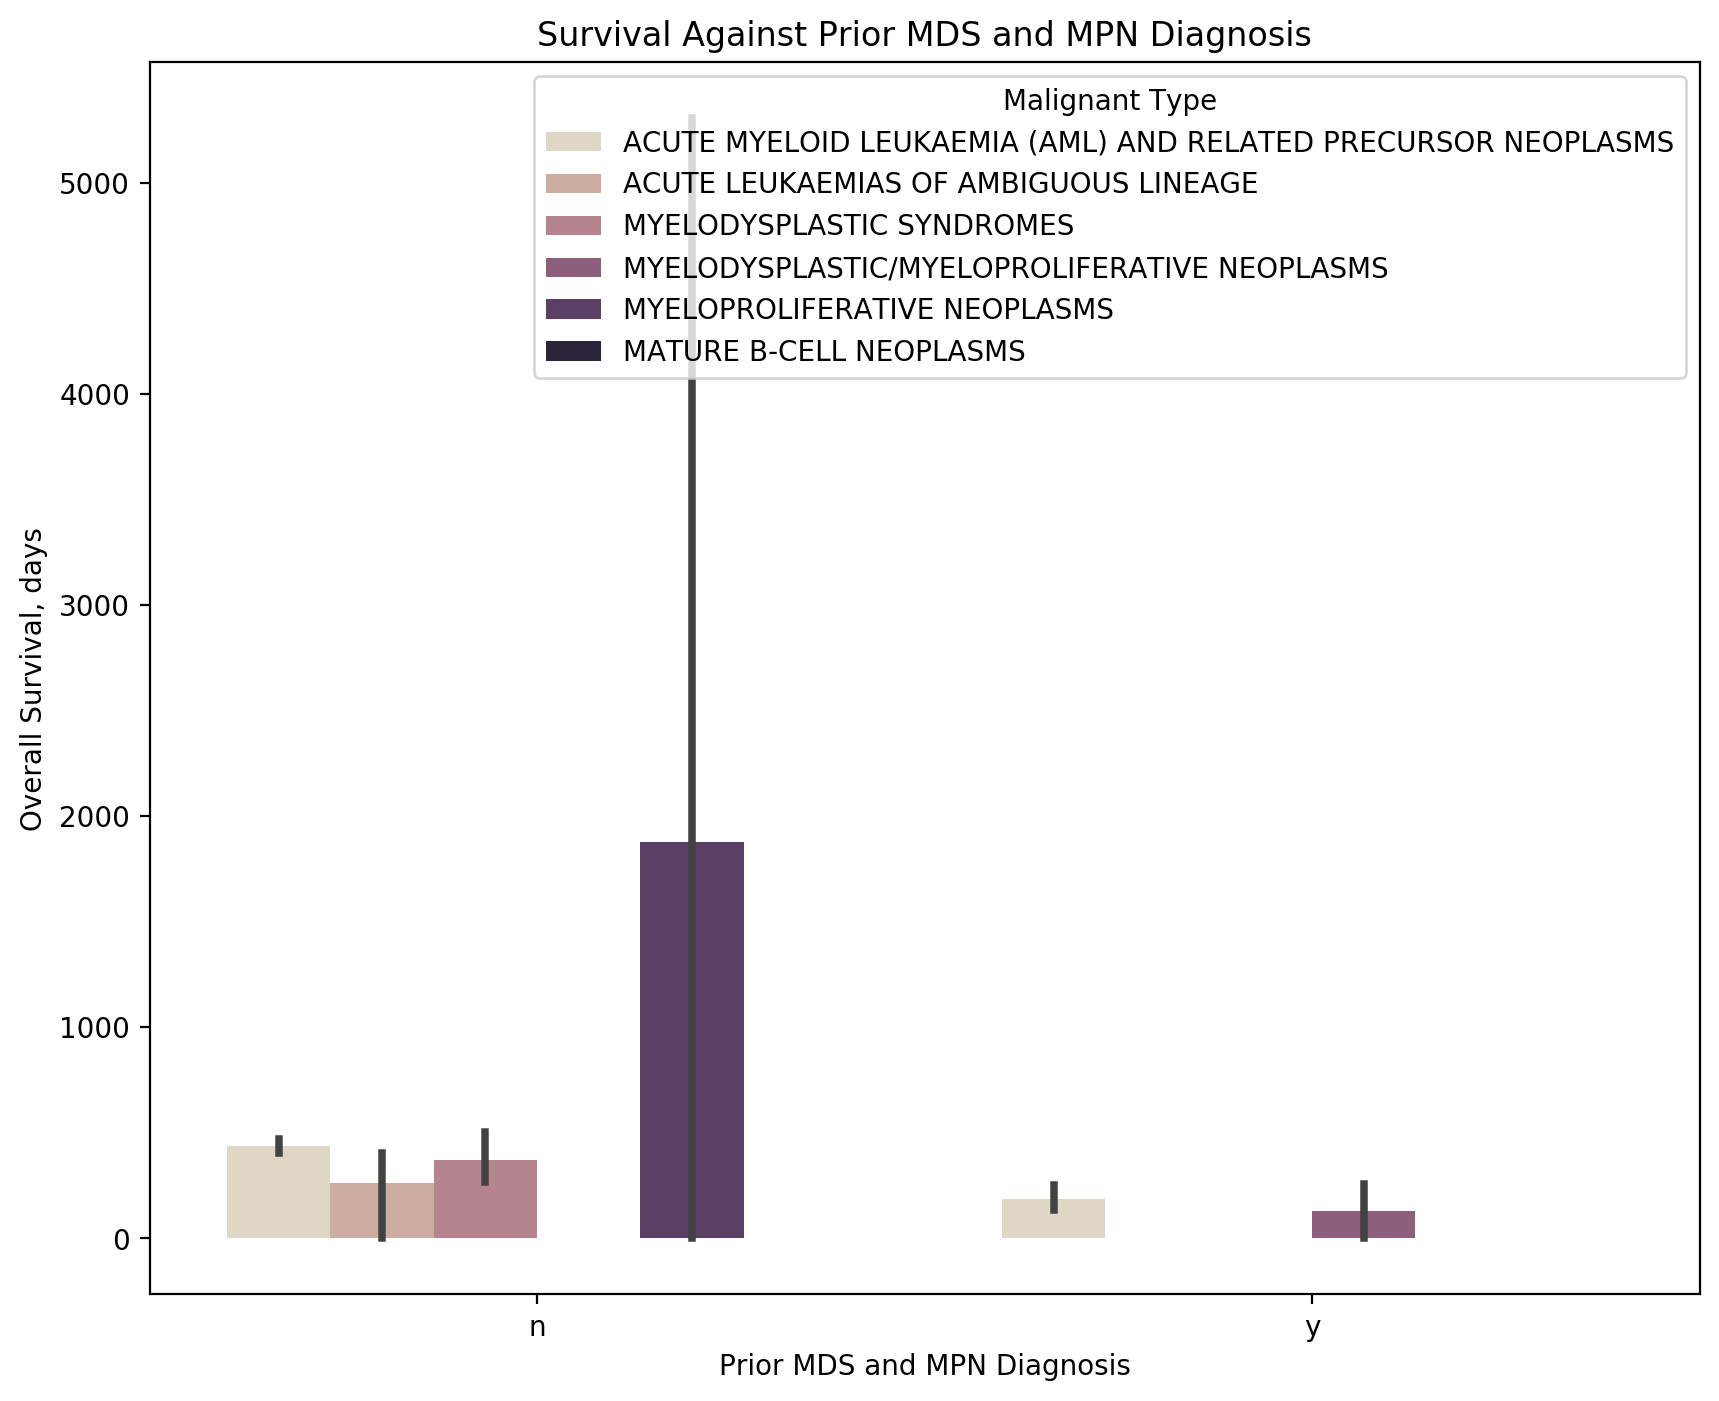

In [807]:
sns.barplot(data= clsm_cut,x = 'priorMDSMPN', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)
plt.xlabel('Prior MDS and MPN Diagnosis')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against Prior MDS and MPN Diagnosis")

Text(0.5, 1.0, 'Survival Against Prior MPN Diagnosis')

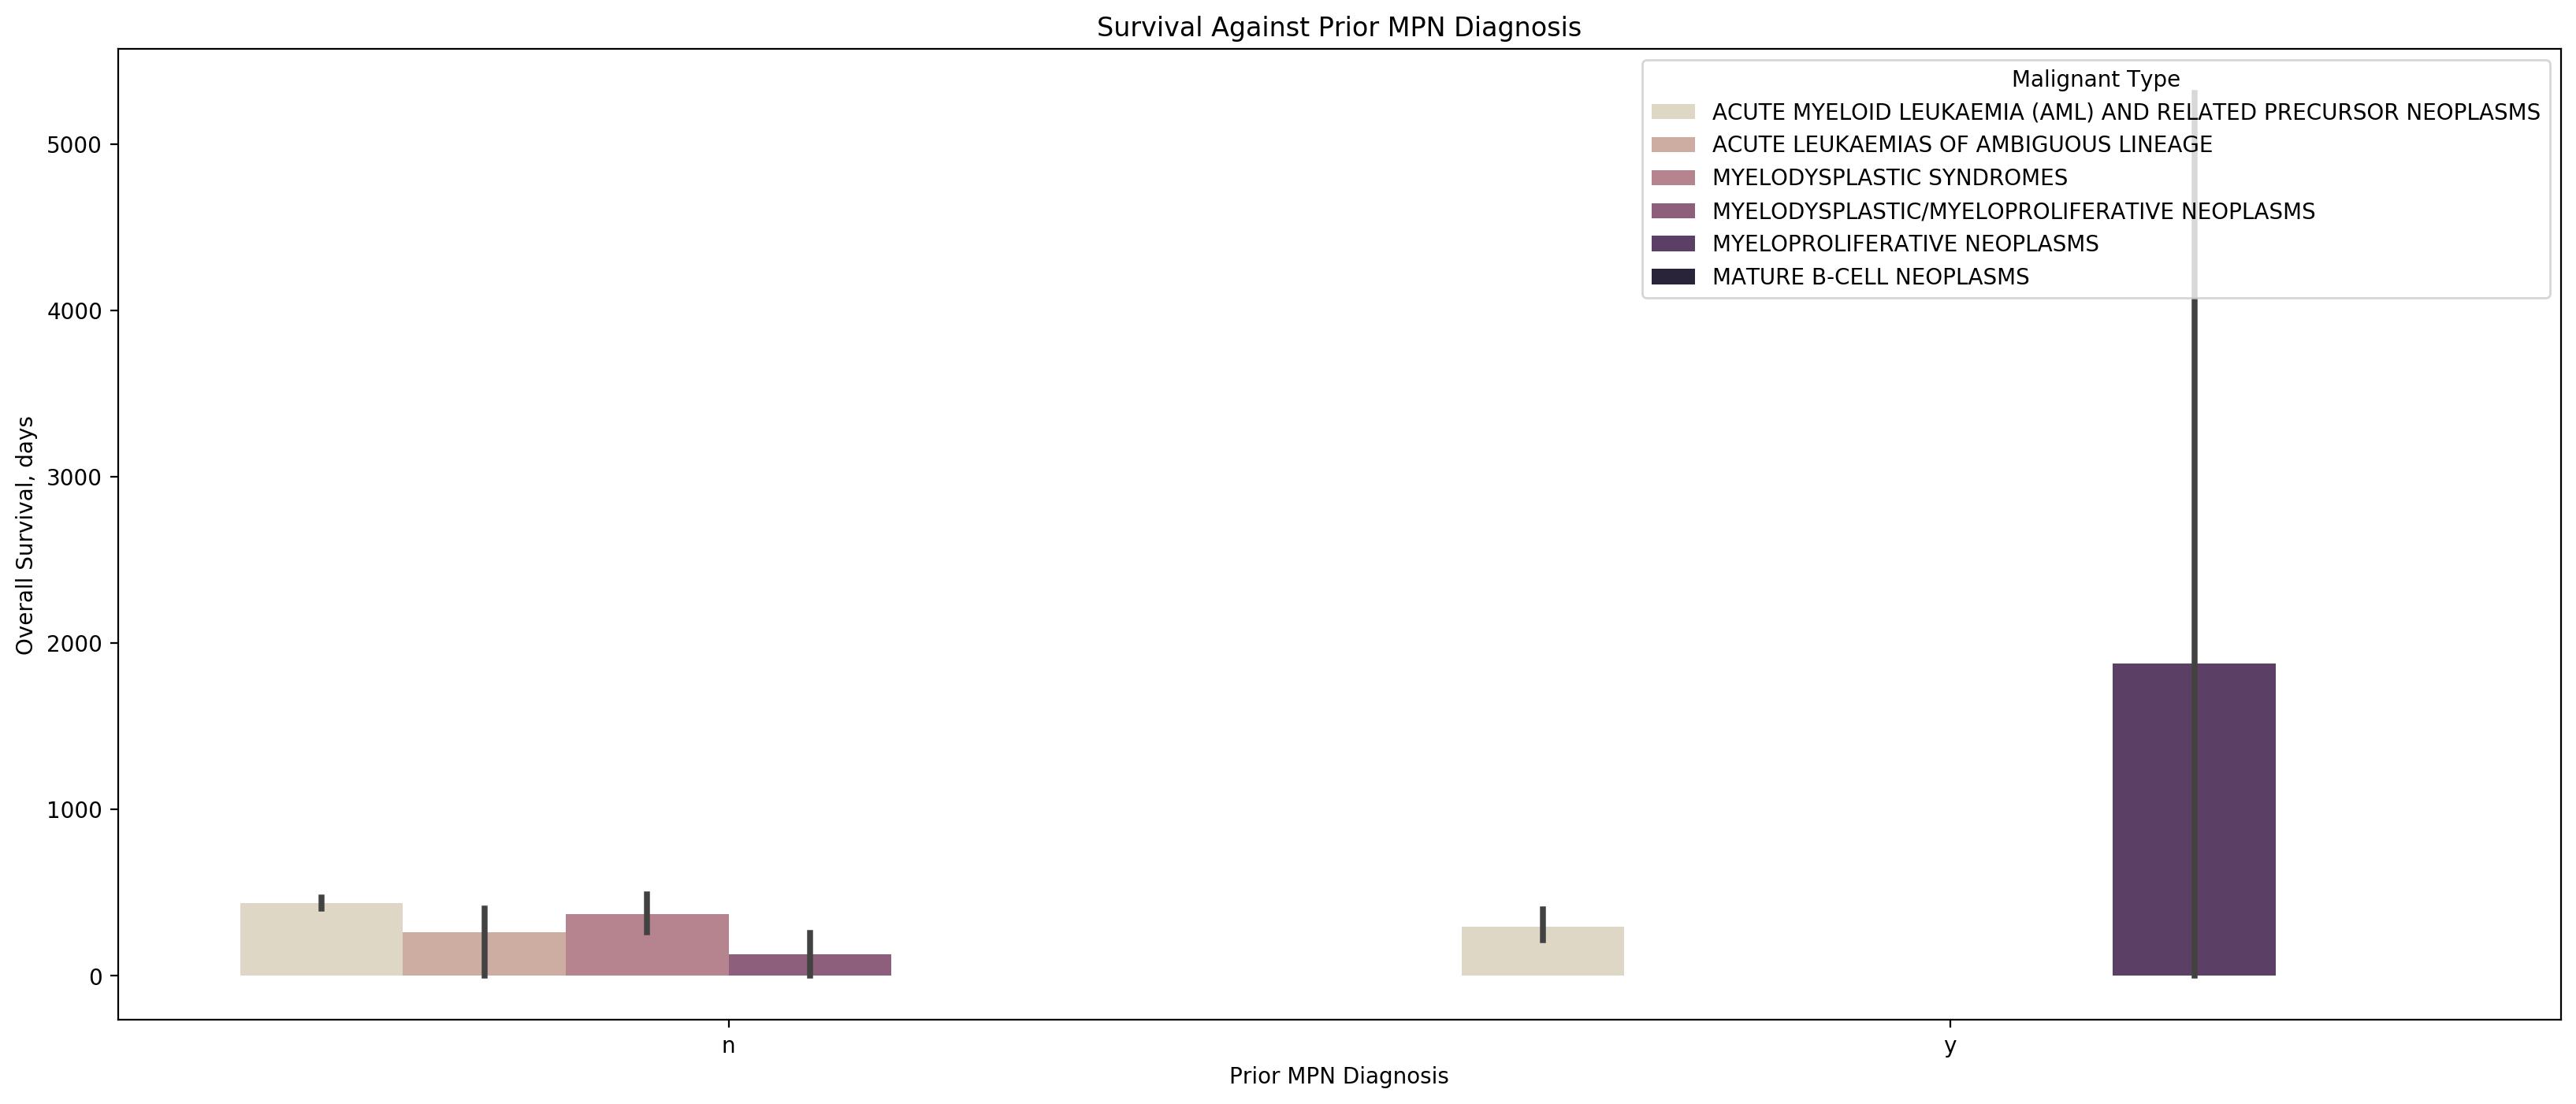

In [808]:
sns.barplot(data= clsm_cut,x = 'priorMPN', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('Prior MPN Diagnosis')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against Prior MPN Diagnosis")

Text(0.5, 1.0, '%Blast in Peripheral Blood against Prior NPM1 Mutation')

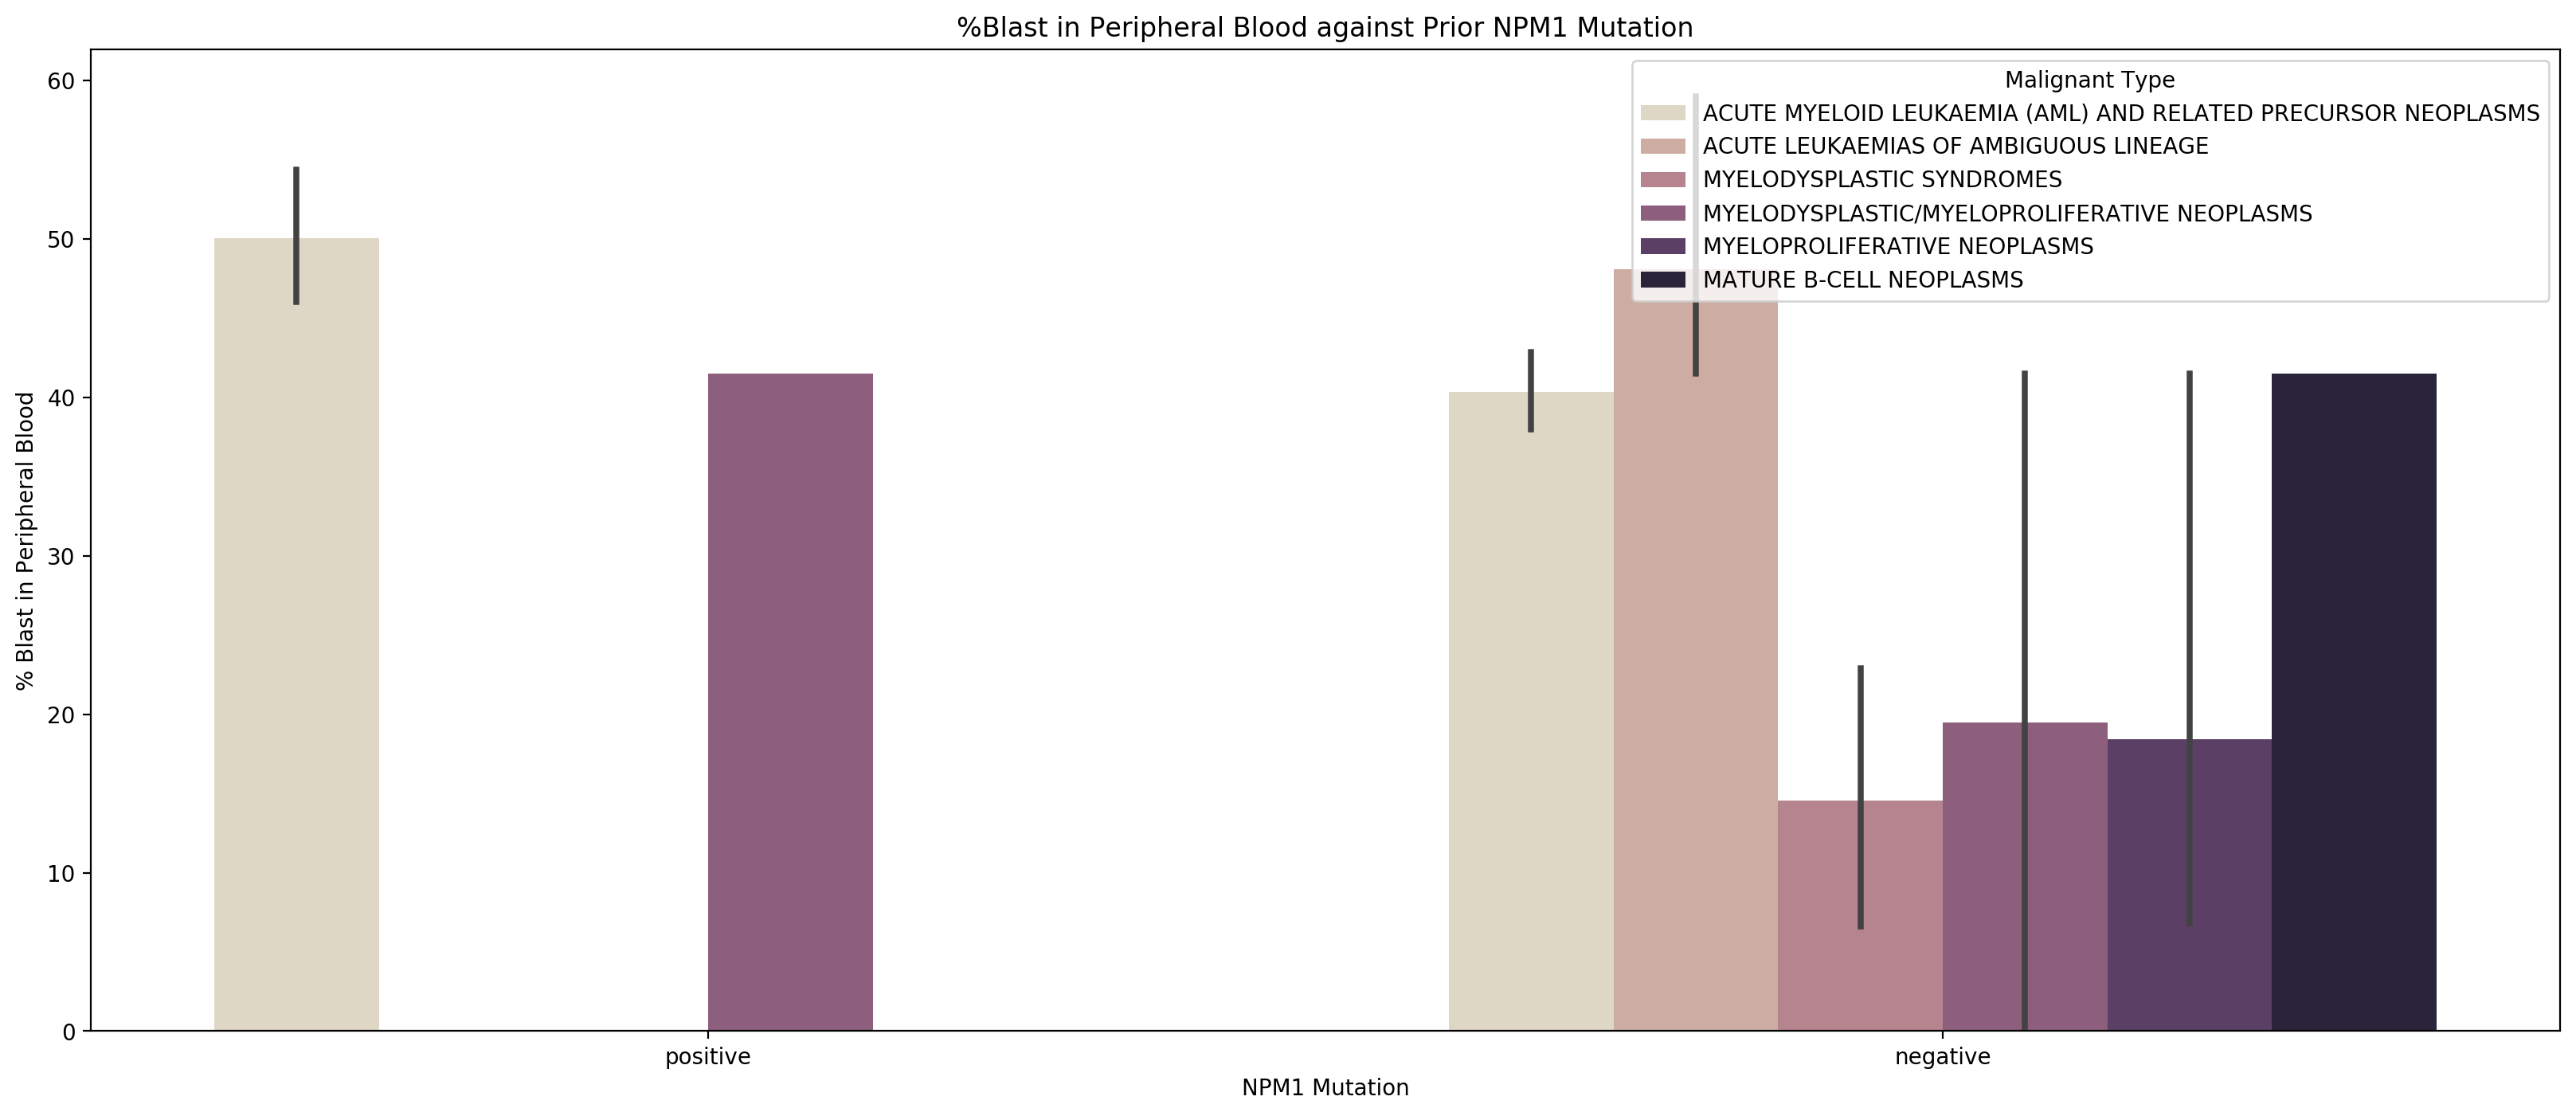

In [809]:
sns.barplot(data= clsm_cut,x = 'NPM1', y = '%.Blasts.in.PB', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('NPM1 Mutation')
plt.ylabel('% Blast in Peripheral Blood')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("%Blast in Peripheral Blood against Prior NPM1 Mutation")


Text(0.5, 1.0, '%Blast in Bone Marrow Against NPM1 Mutation')

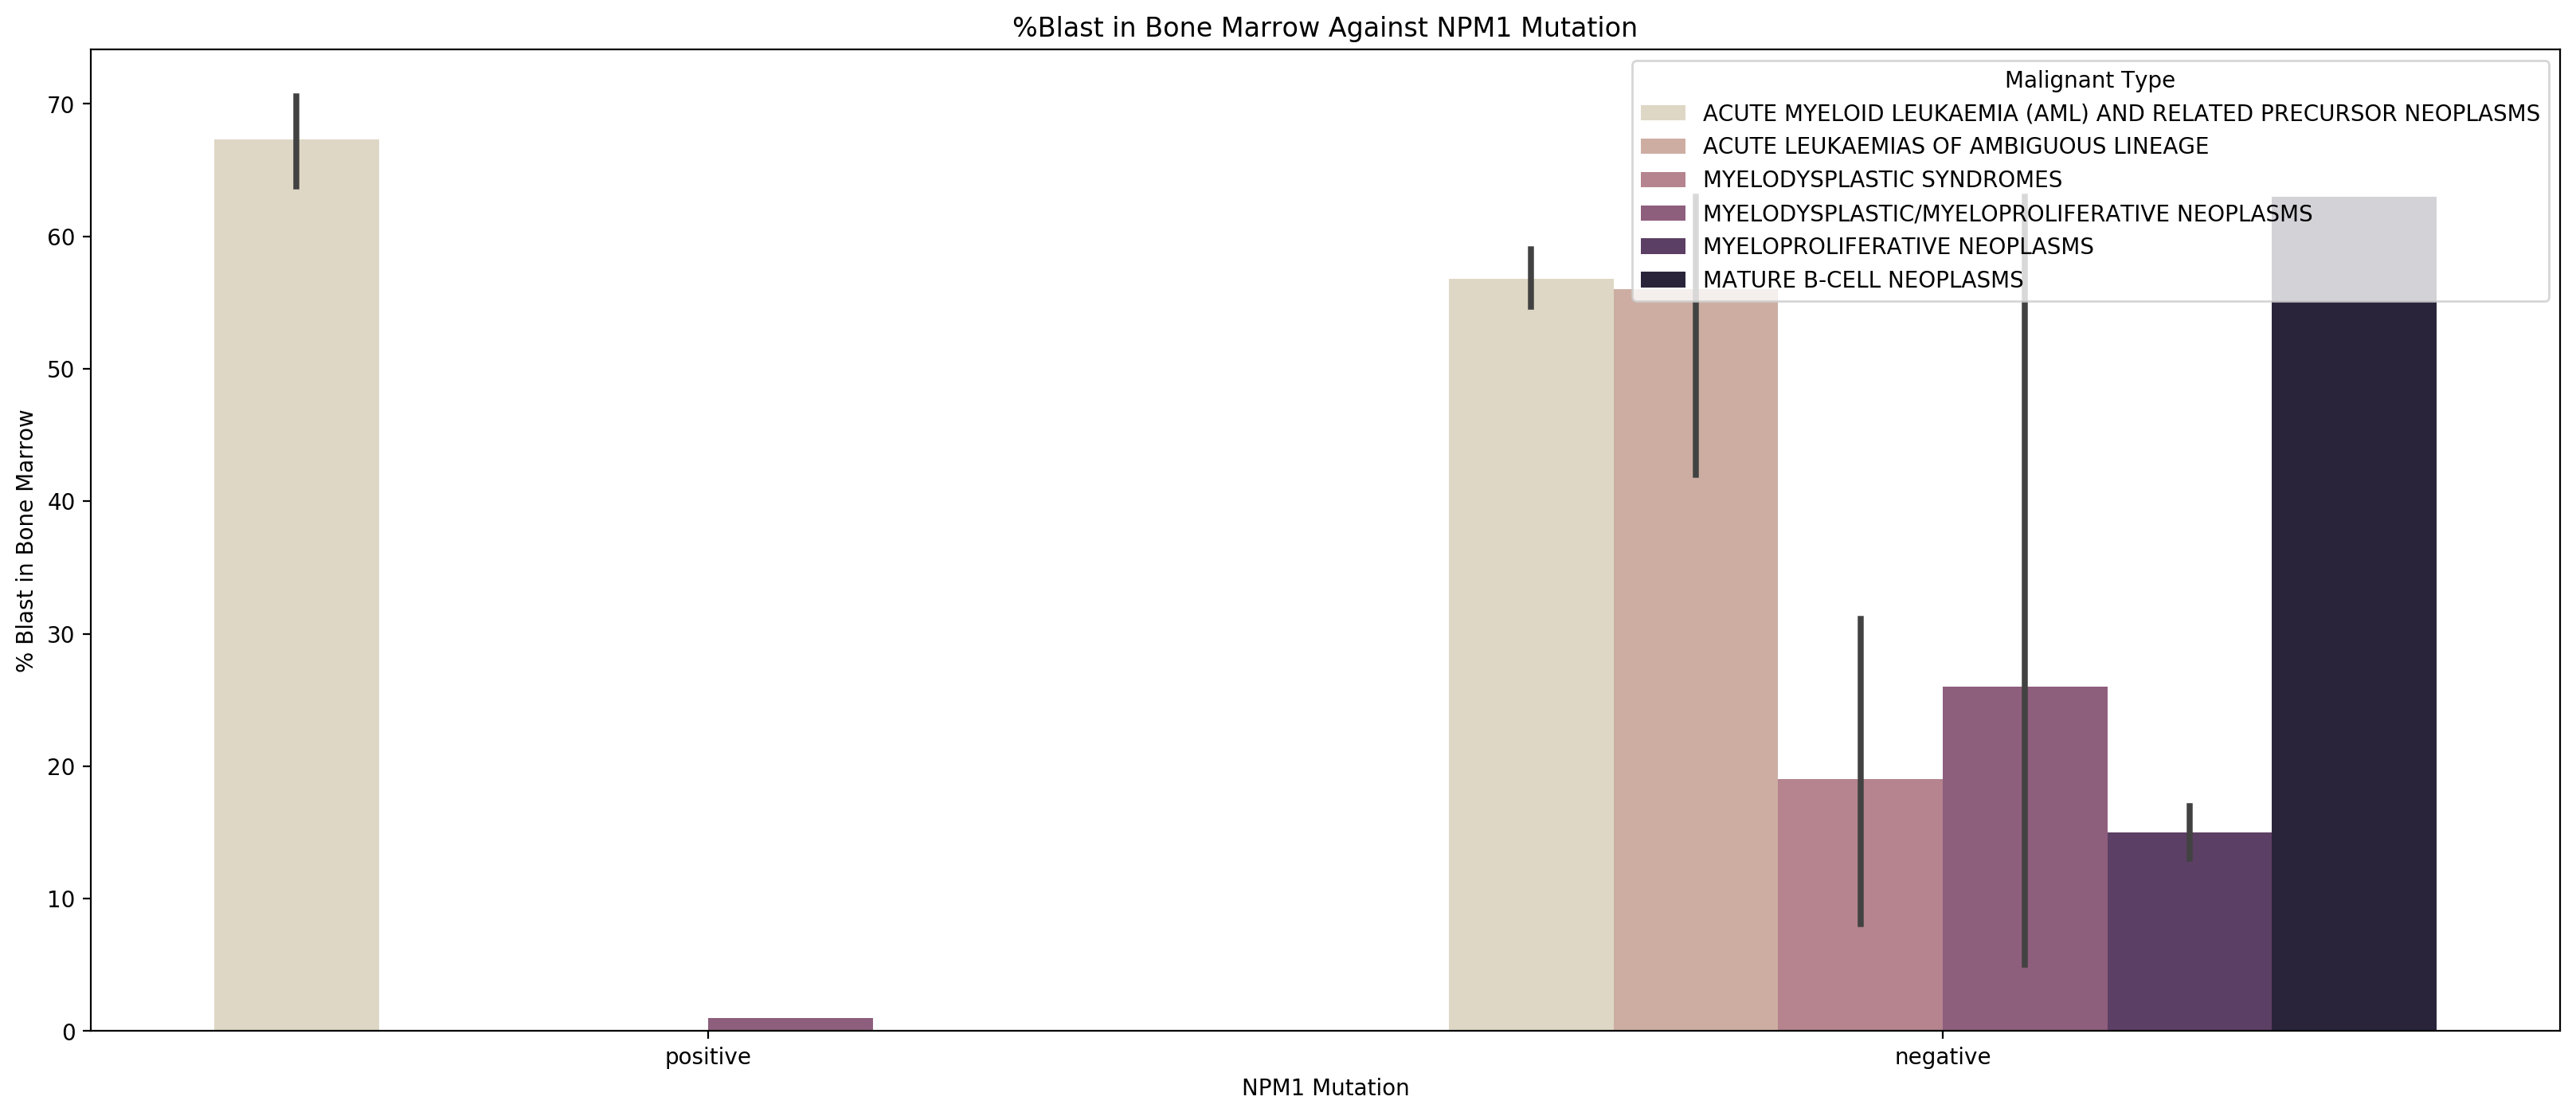

In [810]:
sns.barplot(data= clsm_cut,x = 'NPM1', y = '%.Blasts.in.BM', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('NPM1 Mutation')
plt.ylabel('% Blast in Bone Marrow')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("%Blast in Bone Marrow Against NPM1 Mutation")

Text(0.5, 1.0, '%Blast in Peripheral Blood against Prior NPM1 Mutation')

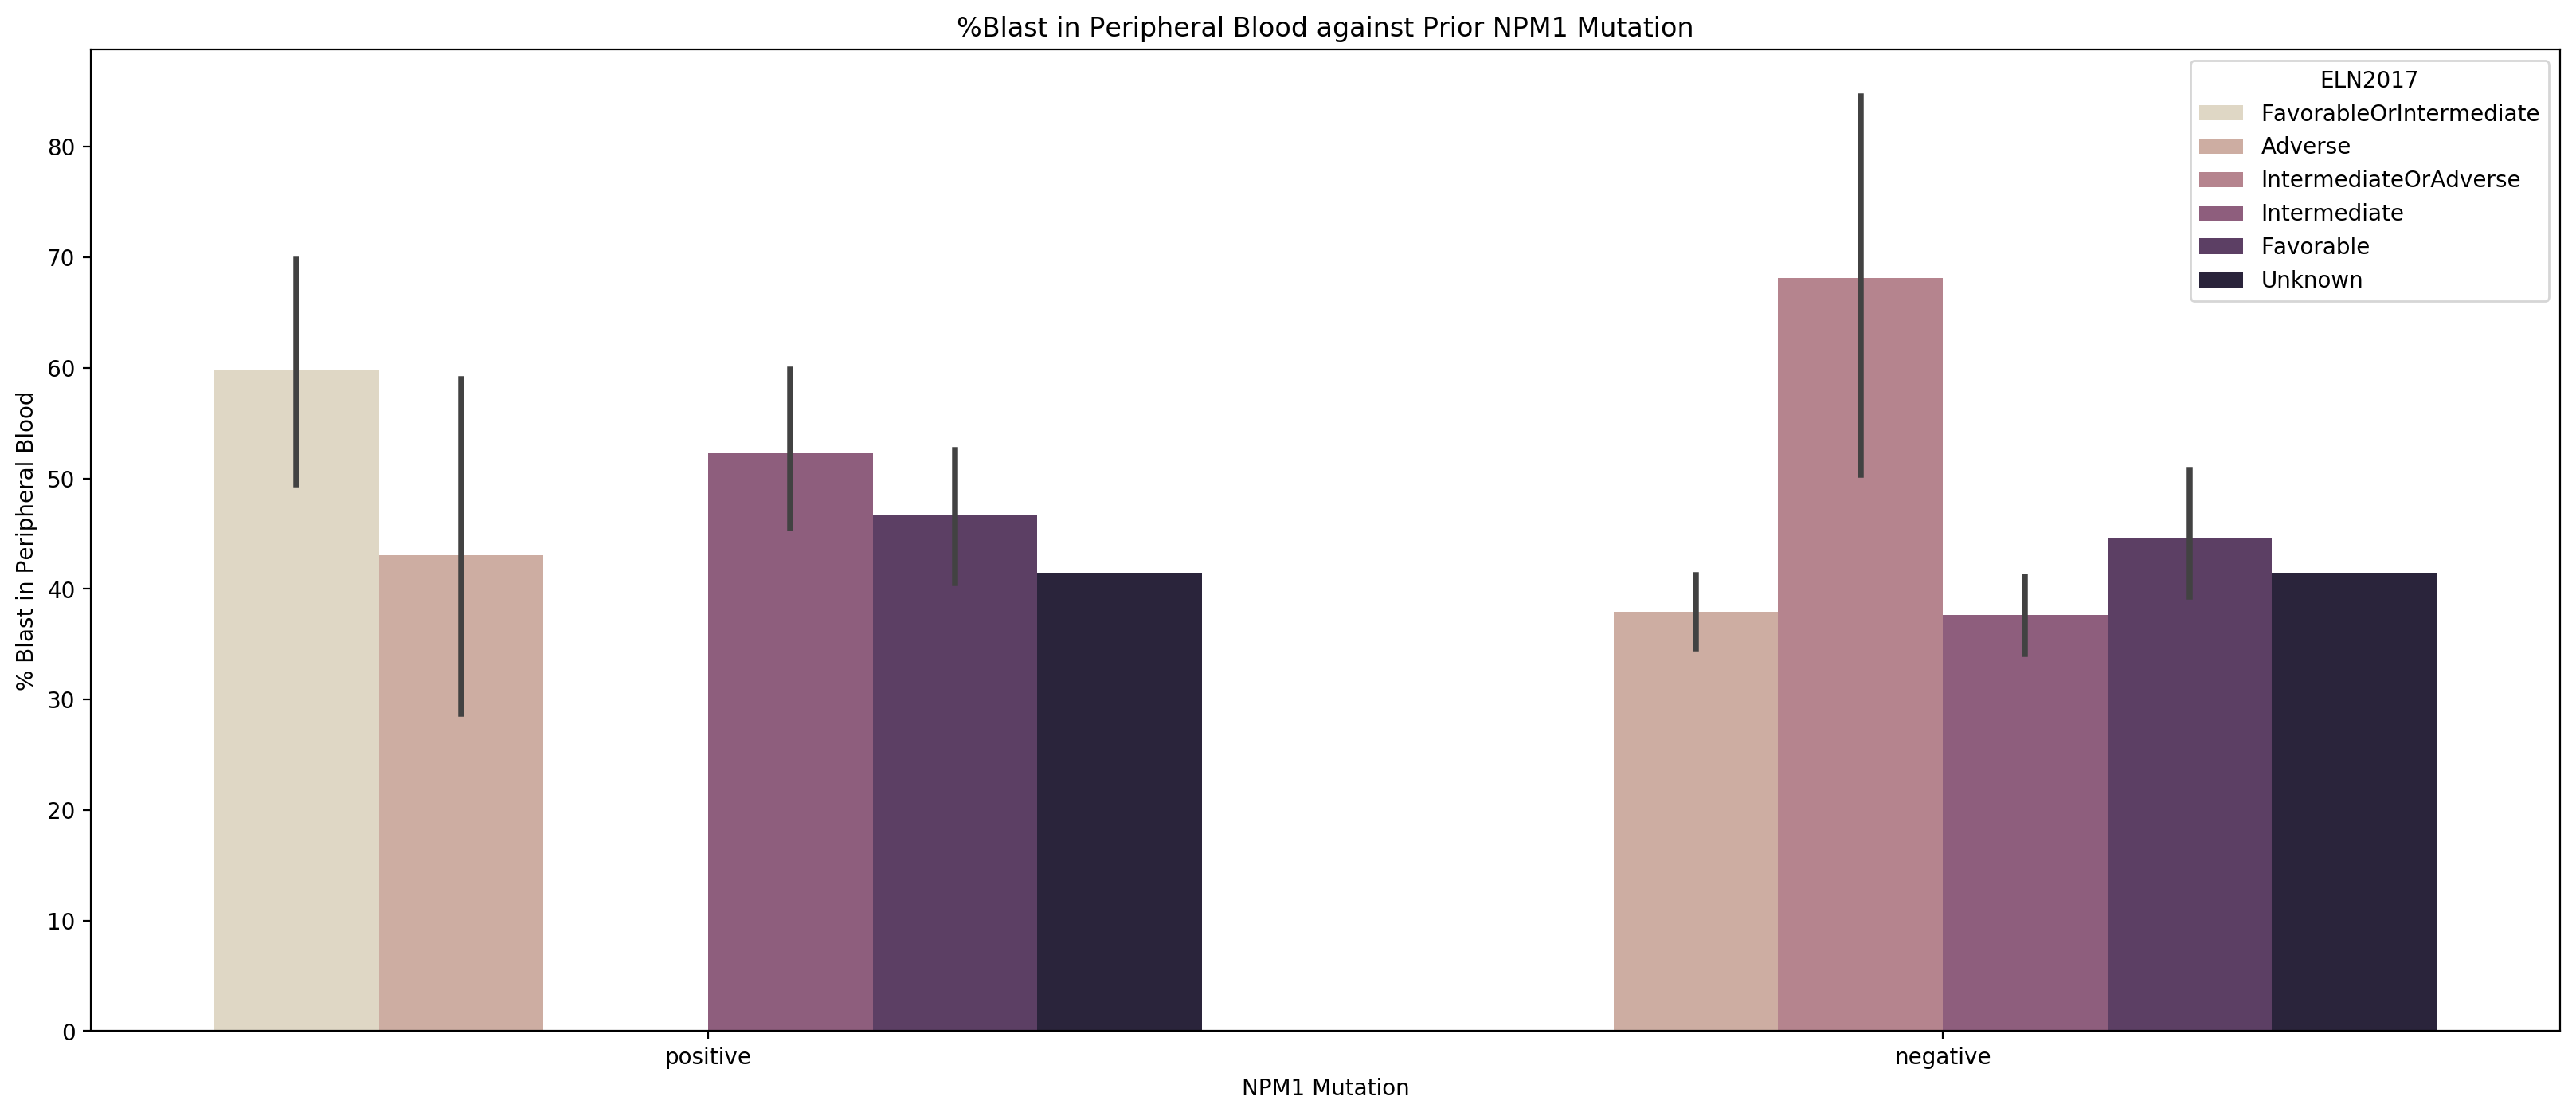

In [811]:
sns.barplot(data= clsm_cut,x = 'NPM1', y = '%.Blasts.in.PB', 
            hue = 'ELN2017', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('NPM1 Mutation')
plt.ylabel('% Blast in Peripheral Blood')
plt.legend(loc='upper right', title = 'ELN2017')
plt.title("%Blast in Peripheral Blood against Prior NPM1 Mutation")

Text(0.5, 1.0, '%Blast in Bone Marrow Against NPM1 Mutation')

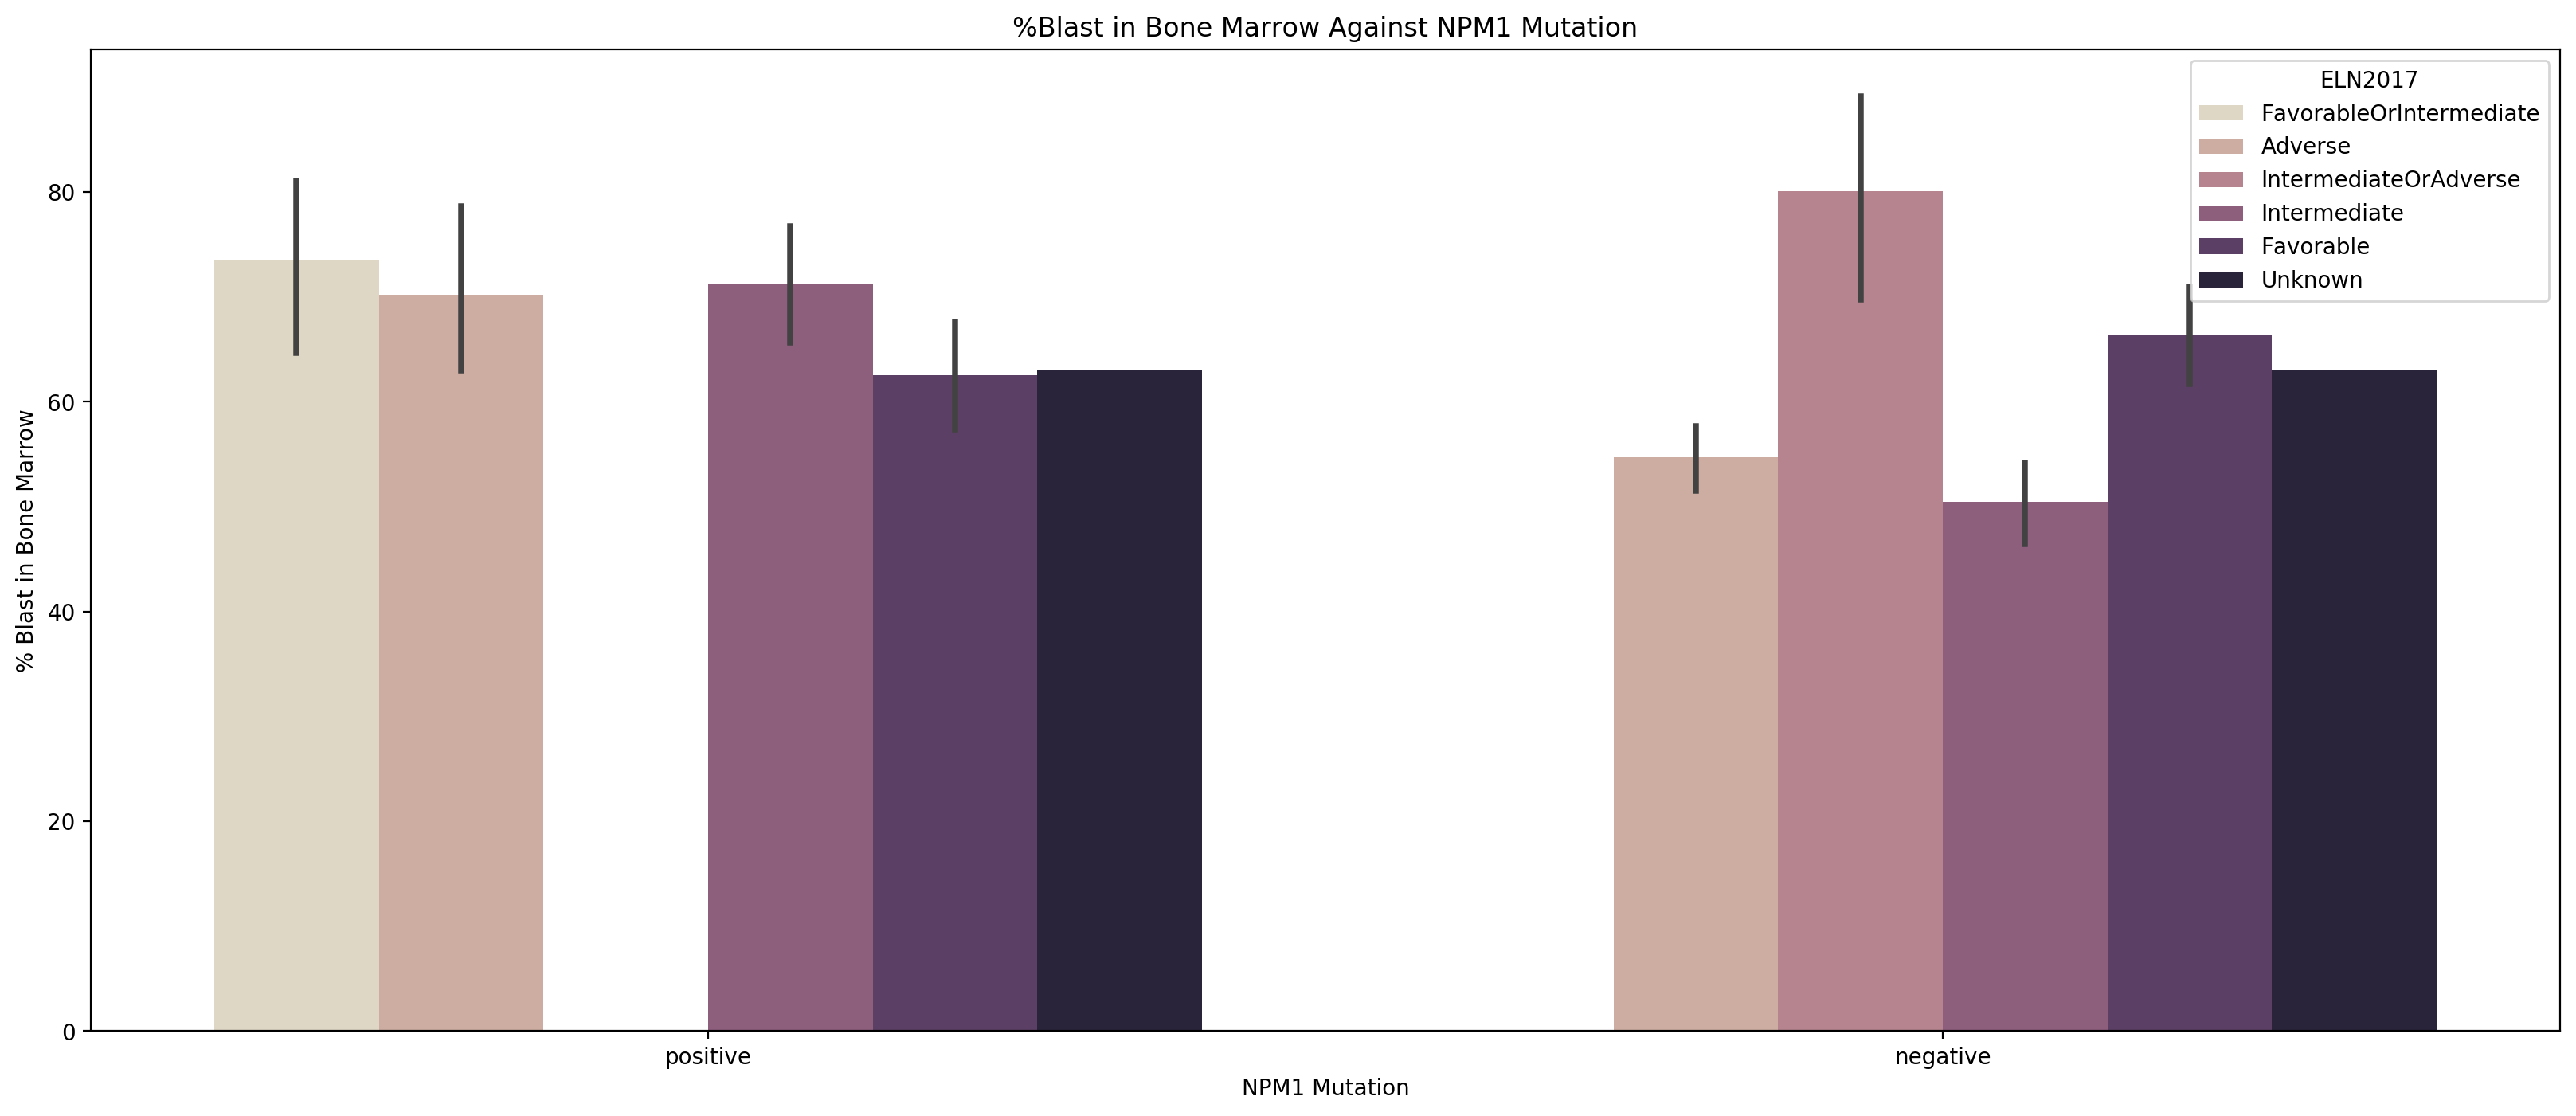

In [812]:
sns.barplot(data= clsm_cut,x = 'NPM1', y = '%.Blasts.in.BM', 
            hue = 'ELN2017', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('NPM1 Mutation')
plt.ylabel('% Blast in Bone Marrow')
plt.legend(loc='upper right', title = 'ELN2017')
plt.title("%Blast in Bone Marrow Against NPM1 Mutation")

In [813]:
#Balance the Dataset
clsm_cut['dxAtSpecimenAcquisition'].value_counts()

ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PRECURSOR NEOPLASMS    646
MYELODYSPLASTIC SYNDROMES                                         15
MYELODYSPLASTIC/MYELOPROLIFERATIVE NEOPLASMS                       4
ACUTE LEUKAEMIAS OF AMBIGUOUS LINEAGE                              3
MYELOPROLIFERATIVE NEOPLASMS                                       3
MATURE B-CELL NEOPLASMS                                            1
Name: dxAtSpecimenAcquisition, dtype: int64

In [814]:
#create column for AML detected
clsm_cut['AML_detected'] = ['yes' if x == 'ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PRECURSOR NEOPLASMS' else 'no' for x in clsm_cut['dxAtSpecimenAcquisition']]
clsm_cut.head()

LabId  PatientId consensus_sex inferred_ethnicity  isRelapse  \
0  09-00705        163          Male              White      False   
1  10-00136        174          Male              White      False   
2  10-00172        175        Female              White      False   
3  10-00507         45        Female              White      False   
4  10-00542        174          Male              White       True   

   isTransformed priorMalignancyNonMyeloid priorMDS priorMDSMPN priorMPN  \
0          False                         n        n           n        n   
1          False                         n        n           n        n   
2          False                         n        n           n        n   
3          False                         n        n           n        n   
4          False                         n        n           n        n   

                   ELN2017                            dxAtSpecimenAcquisition  \
0  FavorableOrIntermediate  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
1                  Adverse  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
2    IntermediateOrAdverse  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
3  FavorableOrIntermediate  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
4                  Adverse  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   

  vitalStatus  overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB  FLT3-ITD  \
0        Dead            425.0            94.0            97.0  positive   
1        Dead            419.0            80.0            19.0  positive   
2        Dead            541.0            91.0            99.0  positive   
3        Dead            511.0            97.0            97.0  positive   
4        Dead            419.0            87.0            80.0  positive   

       NPM1 AML_detected  
0  positive          yes  
1  negative          yes  
2  negative          yes  
3  positive          yes  
4  negative          yes

In [815]:
clsm_cut['AML_detected'].value_counts()

yes    646
no      26
Name: AML_detected, dtype: int64

In [816]:
print("Shape of dataframe before splitting {}".format(clsm_cut.shape))

Shape of dataframe before splitting (672, 19)


In [817]:
#Balance Dataset for predicting AML
from sklearn.utils import resample

has_aml = clsm_cut.query("AML_detected == 'yes'")
no_aml = clsm_cut.query("AML_detected == 'no'")

majority_count = max(clsm_cut.shape[0], no_aml.shape[0])

has_aml = resample(has_aml, replace = True, n_samples = majority_count, random_state = 27)
no_aml = resample(no_aml, replace = True, n_samples = majority_count, random_state = 27)

clsm_cut_bal = pd.concat([has_aml, no_aml])

clsm_cut_bal = clsm_cut_bal.reset_index(drop = True)
clsm_cut_bal.shape

(1344, 19)

In [818]:
clsm_cut_bal['AML_detected'].value_counts()

yes    672
no     672
Name: AML_detected, dtype: int64

In [819]:
#Split the data into Train, Test, and Validation Sets
from sklearn.model_selection import train_test_split

# Split all data into 70% train and 30% holdout
clsm_train, clsm_holdout = train_test_split(clsm_cut_bal, test_size=0.30, stratify=clsm_cut_bal["AML_detected"])

# Split holdout data into 15% validation and 15% test
clsm_validation, clsm_test = train_test_split(clsm_holdout, test_size=0.15, stratify=clsm_holdout["AML_detected"])

In [820]:
clsm_cut['NPM1'].value_counts()

negative    502
positive    170
Name: NPM1, dtype: int64

In [821]:
#Balance Dataset for detecting NPM1
npm1_pos = clsm_cut.query("NPM1 == 'positive'")
npm1_neg = clsm_cut.query("NPM1 == 'negative'")

majority_count = max(npm1_pos.shape[0], npm1_neg.shape[0])

npm1_pos = resample(npm1_pos, replace = True, n_samples = majority_count, random_state = 27)
npm1_neg = resample(npm1_neg, replace = True, n_samples = majority_count, random_state = 27)

npm1_bal = pd.concat([npm1_pos, npm1_neg])

npm1_bal = npm1_bal.reset_index(drop = True)
npm1_bal.shape

(1004, 19)

In [822]:
# Split data into 70% train and 30% holdout
npm1_train, npm1_holdout = train_test_split(npm1_bal, test_size=0.30, stratify=npm1_bal["NPM1"])

# Split holdout data into 15% validation and 15% test
npm1_validation, npm1_test = train_test_split(npm1_holdout, test_size=0.15, stratify=npm1_holdout["NPM1"])

In [823]:
npm1_train.shape

(702, 19)

In [824]:
clsm_cut['ELN2017'].value_counts()

Adverse                    242
Intermediate               235
Favorable                  155
FavorableOrIntermediate     27
IntermediateOrAdverse       11
Unknown                      2
Name: ELN2017, dtype: int64

In [ ]:
#Transfer final dataframe to S3 Bucket
s3_client = boto3.client("s3")
BUCKET='waterteam1'
KEY='raw_files/df2/df2.csv'
response = s3_client.get_object(Bucket=BUCKET, Key=KEY)

with io.StringIO() as csv_buffer:
    df2.to_csv(csv_buffer, index=False, header=True)

    response = s3_client.put_object(
        Bucket=BUCKET, Key=KEY, Body=csv_buffer.getvalue()
    )

In [ ]:
#Transfer final dataframe to S3 Bucket
s3_client = boto3.client("s3")
BUCKET='bcr'
KEY='clsm.cut

In [825]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [826]:
#Set x- and y-train and -valid variables
x_train = clsm_train.drop('AML_detected',axis=1)
y_train = clsm_train['AML_detected']

In [827]:
x_valid = clsm_validation.drop('AML_detected',axis=1)
y_valid = clsm_validation['AML_detected']

In [828]:
#Use get_dummies to transform categorical features into binary/numerical features
x_train_trans = pd.get_dummies(data=x_train, columns=['consensus_sex', 'inferred_ethnicity', 'isRelapse', 'isTransformed', 
                                                        'priorMalignancyNonMyeloid', 'priorMDS', 'priorMDSMPN', 'priorMPN',
                                                        'ELN2017', 'vitalStatus', 'FLT3-ITD', 'NPM1'])

x_valid_trans = pd.get_dummies(data=x_valid, columns=['consensus_sex', 'inferred_ethnicity', 'isRelapse', 'isTransformed',
                                                        'priorMalignancyNonMyeloid', 'priorMDS', 'priorMDSMPN', 'priorMPN', 
                                                        'ELN2017', 'vitalStatus', 'FLT3-ITD', 'NPM1'])

In [829]:
#Generate train and valid data sets with binary features
x_train_trans.head()

LabId  PatientId                            dxAtSpecimenAcquisition  \
996  13-00150       1051              ACUTE LEUKAEMIAS OF AMBIGUOUS LINEAGE   
836  16-00564       2740       MYELODYSPLASTIC/MYELOPROLIFERATIVE NEOPLASMS   
236  15-00294       2010  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
105  14-00815       1814  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
664  16-00027       2473  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   

     overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB  consensus_sex_Female  \
996            404.0            63.0            59.0                     0   
836              0.0             5.0             0.0                     1   
236            335.0            60.0            41.5                     0   
105            833.0             2.0             0.0                     1   
664            393.0            91.0            99.2                     0   

     consensus_sex_Male  inferred_ethnicity_AdmixedBlack  \
996                   1                                0   
836                   0                                0   
236                   1                                0   
105                   0                                0   
664                   1                                0   

     inferred_ethnicity_AdmixedHispNative  ...  \
996                                     0  ...   
836                                     0  ...   
236                                     0  ...   
105                                     0  ...   
664                                     0  ...   

     ELN2017_FavorableOrIntermediate  ELN2017_Intermediate  \
996                                0                     0   
836                                0                     0   
236                                0                     1   
105                                0                     1   
664                                0                     0   

     ELN2017_IntermediateOrAdverse  vitalStatus_Alive  vitalStatus_Dead  \
996                              0                  0                 1   
836                              0                  1                 0   
236                              0                  0                 1   
105                              0                  1                 0   
664                              0                  1                 0   

     vitalStatus_Unknown  FLT3-ITD_negative  FLT3-ITD_positive  NPM1_negative  \
996                    0                  1                  0              1   
836                    0                  1                  0              1   
236                    0                  1                  0              1   
105                    0                  1                  0              1   
664                    0                  0                  1              1   

     NPM1_positive  
996              0  
836              0  
236              0  
105              0  
664              0  

[5 rows x 40 columns]

In [830]:
x_valid_trans.head()

LabId  PatientId                            dxAtSpecimenAcquisition  \
894   16-00332       2621                          MYELODYSPLASTIC SYNDROMES   
52    16-00766       4006  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
1081  16-00484       2701       MYELODYSPLASTIC/MYELOPROLIFERATIVE NEOPLASMS   
48    14-00720       1813  ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...   
819   13-00150       1051              ACUTE LEUKAEMIAS OF AMBIGUOUS LINEAGE   

      overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB  consensus_sex_Female  \
894             292.0            63.0             4.0                     0   
52               97.0            33.0             8.0                     0   
1081            323.0            63.0            41.5                     1   
48             1003.0            17.0             0.0                     0   
819             404.0            63.0            59.0                     0   

      consensus_sex_Male  inferred_ethnicity_AdmixedAsian  \
894                    1                                0   
52                     1                                0   
1081                   0                                0   
48                     1                                0   
819                    1                                0   

      inferred_ethnicity_AdmixedBlack  ...  ELN2017_Intermediate  \
894                                 0  ...                     0   
52                                  0  ...                     0   
1081                                0  ...                     1   
48                                  0  ...                     0   
819                                 0  ...                     0   

      ELN2017_IntermediateOrAdverse  ELN2017_Unknown  vitalStatus_Alive  \
894                               0                0                  0   
52                                0                0                  0   
1081                              0                0                  0   
48                                0                0                  0   
819                               0                0                  0   

      vitalStatus_Dead  vitalStatus_Unknown  FLT3-ITD_negative  \
894                  1                    0                  1   
52                   1                    0                  1   
1081                 0                    1                  1   
48                   1                    0                  0   
819                  1                    0                  1   

      FLT3-ITD_positive  NPM1_negative  NPM1_positive  
894                   0              1              0  
52                    0              1              0  
1081                  0              1              0  
48                    1              1              0  
819                   0              1              0  

[5 rows x 41 columns]

In [833]:
#Drop 'LabId', 'PatientId', and 'dxAtSpecimenAcquisition' features
x_valid_trans.drop(['LabId', 'PatientId', 'dxAtSpecimenAcquisition'], axis = 1, inplace = True)
x_valid_trans

overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB  consensus_sex_Female  \
894             292.0            63.0             4.0                     0   
52               97.0            33.0             8.0                     0   
1081            323.0            63.0            41.5                     1   
48             1003.0            17.0             0.0                     0   
819             404.0            63.0            59.0                     0   
...               ...             ...             ...                   ...   
103             386.0            54.0            54.0                     0   
920               0.0            63.0            41.5                     1   
1026            323.0             2.0            41.5                     1   
73              217.0            95.0            95.0                     0   
441             296.0            63.0            41.5                     0   

      consensus_sex_Male  inferred_ethnicity_AdmixedAsian  \
894                    1                                0   
52                     1                                0   
1081                   0                                0   
48                     1                                0   
819                    1                                0   
...                  ...                              ...   
103                    1                                0   
920                    0                                0   
1026                   0                                0   
73                     1                                0   
441                    1                                0   

      inferred_ethnicity_AdmixedBlack  inferred_ethnicity_AdmixedWhite  \
894                                 0                                0   
52                                  0                                0   
1081                                0                                0   
48                                  0                                0   
819                                 0                                0   
...                               ...                              ...   
103                                 0                                0   
920                                 0                                0   
1026                                0                                0   
73                                  0                                0   
441                                 0                                0   

      inferred_ethnicity_Asian  inferred_ethnicity_Black  ...  \
894                          0                         0  ...   
52                           0                         0  ...   
1081                         0                         0  ...   
48                           0                         0  ...   
819                          0                         0  ...   
...                        ...                       ...  ...   
103                          0                         0  ...   
920                          0                         0  ...   
1026                         0                         0  ...   
73                           0                         0  ...   
441                          0                         0  ...   

      ELN2017_Intermediate  ELN2017_IntermediateOrAdverse  ELN2017_Unknown  \
894                      0                              0                0   
52                       0                              0                0   
1081                     1                              0                0   
48                       0                              0                0   
819                      0                              0                0   
...                    ...                            ...              ...   
103                      1                              0                0   
920                      0    

In [834]:
x_train_trans.drop(['LabId', 'PatientId', 'dxAtSpecimenAcquisition'], axis = 1, inplace = True)
x_train_trans

overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB  consensus_sex_Female  \
996            404.0            63.0            59.0                     0   
836              0.0             5.0             0.0                     1   
236            335.0            60.0            41.5                     0   
105            833.0             2.0             0.0                     1   
664            393.0            91.0            99.2                     0   
..               ...             ...             ...                   ...   
884            189.0             5.0             0.0                     0   
968            189.0             5.0             5.0                     0   
212            514.0            91.8            95.0                     0   
851            189.0             5.0             5.0                     0   
533            124.0            63.0            41.5                     1   

     consensus_sex_Male  inferred_ethnicity_AdmixedBlack  \
996                   1                                0   
836                   0                                0   
236                   1                                0   
105                   0                                0   
664                   1                                0   
..                  ...                              ...   
884                   1                                0   
968                   1                                0   
212                   1                                0   
851                   1                                0   
533                   0                                0   

     inferred_ethnicity_AdmixedHispNative  inferred_ethnicity_AdmixedWhite  \
996                                     0                                0   
836                                     0                                0   
236                                     0                                0   
105                                     0                                0   
664                                     0                                1   
..                                    ...                              ...   
884                                     0                                0   
968                                     0                                0   
212                                     0                                0   
851                                     0                                0   
533                                     0                                0   

     inferred_ethnicity_Asian  inferred_ethnicity_Black  ...  \
996                         0                         0  ...   
836                         0                         0  ...   
236                         0                         0  ...   
105                         0                         0  ...   
664                         0                         0  ...   
..                        ...                       ...  ...   
884                         0                         0  ...   
968                         0                         0  ...   
212                         0                         0  ...   
851                         0                         0  ...   
533                         0                         0  ...   

     ELN2017_FavorableOrIntermediate  ELN2017_Intermediate  \
996                                0                     0   
836                                0                     0   
236                                0                     1   
105                                0                     1   
664                                0                     0   
..                               ...                   ...   
884                                0                     1   
968                                0                     0   
212                                0                     0   
851                  

In [835]:
#Generate column lists from train set
print(x_train_trans.columns.tolist())

['overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 'consensus_sex_Female', 'consensus_sex_Male', 'inferred_ethnicity_AdmixedBlack', 'inferred_ethnicity_AdmixedHispNative', 'inferred_ethnicity_AdmixedWhite', 'inferred_ethnicity_Asian', 'inferred_ethnicity_Black', 'inferred_ethnicity_HispNative', 'inferred_ethnicity_White', 'inferred_ethnicity_white', 'isRelapse_False', 'isRelapse_True', 'isTransformed_False', 'isTransformed_True', 'priorMalignancyNonMyeloid_n', 'priorMalignancyNonMyeloid_y', 'priorMDS_n', 'priorMDS_y', 'priorMDSMPN_n', 'priorMDSMPN_y', 'priorMPN_n', 'priorMPN_y', 'ELN2017_Adverse', 'ELN2017_Favorable', 'ELN2017_FavorableOrIntermediate', 'ELN2017_Intermediate', 'ELN2017_IntermediateOrAdverse', 'vitalStatus_Alive', 'vitalStatus_Dead', 'vitalStatus_Unknown', 'FLT3-ITD_negative', 'FLT3-ITD_positive', 'NPM1_negative', 'NPM1_positive']


In [836]:
print(x_valid_trans.columns.tolist())

['overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 'consensus_sex_Female', 'consensus_sex_Male', 'inferred_ethnicity_AdmixedAsian', 'inferred_ethnicity_AdmixedBlack', 'inferred_ethnicity_AdmixedWhite', 'inferred_ethnicity_Asian', 'inferred_ethnicity_Black', 'inferred_ethnicity_HispNative', 'inferred_ethnicity_White', 'inferred_ethnicity_white', 'isRelapse_False', 'isRelapse_True', 'isTransformed_False', 'isTransformed_True', 'priorMalignancyNonMyeloid_n', 'priorMalignancyNonMyeloid_y', 'priorMDS_n', 'priorMDS_y', 'priorMDSMPN_n', 'priorMDSMPN_y', 'priorMPN_n', 'priorMPN_y', 'ELN2017_Adverse', 'ELN2017_Favorable', 'ELN2017_FavorableOrIntermediate', 'ELN2017_Intermediate', 'ELN2017_IntermediateOrAdverse', 'ELN2017_Unknown', 'vitalStatus_Alive', 'vitalStatus_Dead', 'vitalStatus_Unknown', 'FLT3-ITD_negative', 'FLT3-ITD_positive', 'NPM1_negative', 'NPM1_positive']


In [837]:
#Drop 'inferred_ethnicity_white' feature from both train and valid sets
x_train_trans.drop(['inferred_ethnicity_white'], axis=1, inplace=True)

In [838]:
x_valid_trans.drop(['inferred_ethnicity_white'], axis=1, inplace=True)

In [839]:
#Combine 'inferred_ethnicity_Admixed('race')' and 'inferred_ethnicity_('race')' features into one column from train set
print(x_train_trans.columns.tolist())

['overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 'consensus_sex_Female', 'consensus_sex_Male', 'inferred_ethnicity_AdmixedBlack', 'inferred_ethnicity_AdmixedHispNative', 'inferred_ethnicity_AdmixedWhite', 'inferred_ethnicity_Asian', 'inferred_ethnicity_Black', 'inferred_ethnicity_HispNative', 'inferred_ethnicity_White', 'isRelapse_False', 'isRelapse_True', 'isTransformed_False', 'isTransformed_True', 'priorMalignancyNonMyeloid_n', 'priorMalignancyNonMyeloid_y', 'priorMDS_n', 'priorMDS_y', 'priorMDSMPN_n', 'priorMDSMPN_y', 'priorMPN_n', 'priorMPN_y', 'ELN2017_Adverse', 'ELN2017_Favorable', 'ELN2017_FavorableOrIntermediate', 'ELN2017_Intermediate', 'ELN2017_IntermediateOrAdverse', 'vitalStatus_Alive', 'vitalStatus_Dead', 'vitalStatus_Unknown', 'FLT3-ITD_negative', 'FLT3-ITD_positive', 'NPM1_negative', 'NPM1_positive']


In [840]:
df = x_train_trans

In [841]:
df['inferred_ethnicity_white'] = df['inferred_ethnicity_AdmixedWhite'] + df['inferred_ethnicity_White']
df

overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB  consensus_sex_Female  \
996            404.0            63.0            59.0                     0   
836              0.0             5.0             0.0                     1   
236            335.0            60.0            41.5                     0   
105            833.0             2.0             0.0                     1   
664            393.0            91.0            99.2                     0   
..               ...             ...             ...                   ...   
884            189.0             5.0             0.0                     0   
968            189.0             5.0             5.0                     0   
212            514.0            91.8            95.0                     0   
851            189.0             5.0             5.0                     0   
533            124.0            63.0            41.5                     1   

     consensus_sex_Male  inferred_ethnicity_AdmixedBlack  \
996                   1                                0   
836                   0                                0   
236                   1                                0   
105                   0                                0   
664                   1                                0   
..                  ...                              ...   
884                   1                                0   
968                   1                                0   
212                   1                                0   
851                   1                                0   
533                   0                                0   

     inferred_ethnicity_AdmixedHispNative  inferred_ethnicity_AdmixedWhite  \
996                                     0                                0   
836                                     0                                0   
236                                     0                                0   
105                                     0                                0   
664                                     0                                1   
..                                    ...                              ...   
884                                     0                                0   
968                                     0                                0   
212                                     0                                0   
851                                     0                                0   
533                                     0                                0   

     inferred_ethnicity_Asian  inferred_ethnicity_Black  ...  \
996                         0                         0  ...   
836                         0                         0  ...   
236                         0                         0  ...   
105                         0                         0  ...   
664                         0                         0  ...   
..                        ...                       ...  ...   
884                         0                         0  ...   
968                         0                         0  ...   
212                         0                         0  ...   
851                         0                         0  ...   
533                         0                         0  ...   

     ELN2017_Intermediate  ELN2017_IntermediateOrAdverse  vitalStatus_Alive  \
996                     0                              0                  0   
836                     0                              0                  1   
236                     1                              0                  0   
105                     1                              0                  1   
664                     0                              0                  1   
..                    ...                            ...                ...   
884                     1                              0                  1   
968      

In [843]:
x_train_trans = df

In [844]:
x_train_trans['inferred_ethnicity_hispnative'] = x_train_trans['inferred_ethnicity_AdmixedHispNative'] + x_train_trans['inferred_ethnicity_HispNative']
x_train_trans['inferred_ethnicity_black'] = x_train_trans['inferred_ethnicity_AdmixedBlack'] + x_train_trans['inferred_ethnicity_Black']

In [845]:
#View new created combined features
print(x_train_trans.columns.tolist())

['overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 'consensus_sex_Female', 'consensus_sex_Male', 'inferred_ethnicity_AdmixedBlack', 'inferred_ethnicity_AdmixedHispNative', 'inferred_ethnicity_AdmixedWhite', 'inferred_ethnicity_Asian', 'inferred_ethnicity_Black', 'inferred_ethnicity_HispNative', 'inferred_ethnicity_White', 'isRelapse_False', 'isRelapse_True', 'isTransformed_False', 'isTransformed_True', 'priorMalignancyNonMyeloid_n', 'priorMalignancyNonMyeloid_y', 'priorMDS_n', 'priorMDS_y', 'priorMDSMPN_n', 'priorMDSMPN_y', 'priorMPN_n', 'priorMPN_y', 'ELN2017_Adverse', 'ELN2017_Favorable', 'ELN2017_FavorableOrIntermediate', 'ELN2017_Intermediate', 'ELN2017_IntermediateOrAdverse', 'vitalStatus_Alive', 'vitalStatus_Dead', 'vitalStatus_Unknown', 'FLT3-ITD_negative', 'FLT3-ITD_positive', 'NPM1_negative', 'NPM1_positive', 'inferred_ethnicity_white', 'inferred_ethnicity_hispnative', 'inferred_ethnicity_black']


In [846]:
#Now, drop original 'inferred_ethnicity_Admixed('race')' and 'inferred_ethnicity_('race')' from train feature list
x_train_trans.drop(['inferred_ethnicity_AdmixedBlack', 'inferred_ethnicity_AdmixedHispNative', 'inferred_ethnicity_AdmixedWhite',
                    'inferred_ethnicity_Black', 'inferred_ethnicity_HispNative', 'inferred_ethnicity_White'], axis=1, inplace=True)

In [848]:
print(x_train_trans.columns.tolist())

['overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 'consensus_sex_Female', 'consensus_sex_Male', 'inferred_ethnicity_Asian', 'isRelapse_False', 'isRelapse_True', 'isTransformed_False', 'isTransformed_True', 'priorMalignancyNonMyeloid_n', 'priorMalignancyNonMyeloid_y', 'priorMDS_n', 'priorMDS_y', 'priorMDSMPN_n', 'priorMDSMPN_y', 'priorMPN_n', 'priorMPN_y', 'ELN2017_Adverse', 'ELN2017_Favorable', 'ELN2017_FavorableOrIntermediate', 'ELN2017_Intermediate', 'ELN2017_IntermediateOrAdverse', 'vitalStatus_Alive', 'vitalStatus_Dead', 'vitalStatus_Unknown', 'FLT3-ITD_negative', 'FLT3-ITD_positive', 'NPM1_negative', 'NPM1_positive', 'inferred_ethnicity_white', 'inferred_ethnicity_hispnative', 'inferred_ethnicity_black']


In [849]:
x_train_trans

overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB  consensus_sex_Female  \
996            404.0            63.0            59.0                     0   
836              0.0             5.0             0.0                     1   
236            335.0            60.0            41.5                     0   
105            833.0             2.0             0.0                     1   
664            393.0            91.0            99.2                     0   
..               ...             ...             ...                   ...   
884            189.0             5.0             0.0                     0   
968            189.0             5.0             5.0                     0   
212            514.0            91.8            95.0                     0   
851            189.0             5.0             5.0                     0   
533            124.0            63.0            41.5                     1   

     consensus_sex_Male  inferred_ethnicity_Asian  isRelapse_False  \
996                   1                         0                1   
836                   0                         0                1   
236                   1                         0                1   
105                   0                         0                1   
664                   1                         0                1   
..                  ...                       ...              ...   
884                   1                         0                1   
968                   1                         0                1   
212                   1                         0                1   
851                   1                         0                1   
533                   0                         0                0   

     isRelapse_True  isTransformed_False  isTransformed_True  ...  \
996               0                    1                   0  ...   
836               0                    1                   0  ...   
236               0                    0                   1  ...   
105               0                    1                   0  ...   
664               0                    1                   0  ...   
..              ...                  ...                 ...  ...   
884               0                    1                   0  ...   
968               0                    1                   0  ...   
212               0                    1                   0  ...   
851               0                    1                   0  ...   
533               1                    1                   0  ...   

     vitalStatus_Alive  vitalStatus_Dead  vitalStatus_Unknown  \
996                  0                 1                    0   
836                  1                 0                    0   
236                  0                 1                    0   
105                  1                 0                    0   
664                  1                 0                    0   
..                 ...               ...                  ...   
884                  1                 0                    0   
968                  1                 0                    0   
212                  1                 0                    0   
851                  1                 0                    0   
533                  0                 1                    0   

     FLT3-ITD_negative  FLT3-ITD_positive  NPM1_negative  NPM1_positive  \
996                  1                  0              1              0   
836                  1                  0              1              0   
236                  1                  0              1              0   
105                  1                  0              1              0   
664                  0                  1              1              0   
..                 ...                ...            ...            ...   
884                  1                  0              1              0   
968              

In [850]:
print(x_valid_trans.columns.tolist())

['overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 'consensus_sex_Female', 'consensus_sex_Male', 'inferred_ethnicity_AdmixedAsian', 'inferred_ethnicity_AdmixedBlack', 'inferred_ethnicity_AdmixedWhite', 'inferred_ethnicity_Asian', 'inferred_ethnicity_Black', 'inferred_ethnicity_HispNative', 'inferred_ethnicity_White', 'isRelapse_False', 'isRelapse_True', 'isTransformed_False', 'isTransformed_True', 'priorMalignancyNonMyeloid_n', 'priorMalignancyNonMyeloid_y', 'priorMDS_n', 'priorMDS_y', 'priorMDSMPN_n', 'priorMDSMPN_y', 'priorMPN_n', 'priorMPN_y', 'ELN2017_Adverse', 'ELN2017_Favorable', 'ELN2017_FavorableOrIntermediate', 'ELN2017_Intermediate', 'ELN2017_IntermediateOrAdverse', 'ELN2017_Unknown', 'vitalStatus_Alive', 'vitalStatus_Dead', 'vitalStatus_Unknown', 'FLT3-ITD_negative', 'FLT3-ITD_positive', 'NPM1_negative', 'NPM1_positive']


In [852]:
x_valid_trans = x_valid_trans

In [854]:
#Combine 'inferred_ethnicity_Admixed('race') and 'inferred_ethnicity_('race') features into one column from valid set
x_valid_trans['inferred_ethnicity_asian'] = x_valid_trans['inferred_ethnicity_AdmixedAsian'] + x_valid_trans['inferred_ethnicity_Asian']
x_valid_trans['inferred_ethnicity_black'] = x_valid_trans['inferred_ethnicity_AdmixedBlack'] + x_valid_trans['inferred_ethnicity_Black']
x_valid_trans['inferred_ethnicity_white'] = x_valid_trans['inferred_ethnicity_AdmixedWhite'] + x_valid_trans['inferred_ethnicity_White']

In [856]:
#View new created combined features
print(x_valid_trans.columns.tolist())

['overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 'consensus_sex_Female', 'consensus_sex_Male', 'inferred_ethnicity_AdmixedAsian', 'inferred_ethnicity_AdmixedBlack', 'inferred_ethnicity_AdmixedWhite', 'inferred_ethnicity_Asian', 'inferred_ethnicity_Black', 'inferred_ethnicity_HispNative', 'inferred_ethnicity_White', 'isRelapse_False', 'isRelapse_True', 'isTransformed_False', 'isTransformed_True', 'priorMalignancyNonMyeloid_n', 'priorMalignancyNonMyeloid_y', 'priorMDS_n', 'priorMDS_y', 'priorMDSMPN_n', 'priorMDSMPN_y', 'priorMPN_n', 'priorMPN_y', 'ELN2017_Adverse', 'ELN2017_Favorable', 'ELN2017_FavorableOrIntermediate', 'ELN2017_Intermediate', 'ELN2017_IntermediateOrAdverse', 'ELN2017_Unknown', 'vitalStatus_Alive', 'vitalStatus_Dead', 'vitalStatus_Unknown', 'FLT3-ITD_negative', 'FLT3-ITD_positive', 'NPM1_negative', 'NPM1_positive', 'inferred_ethnicity_asian', 'inferred_ethnicity_black', 'inferred_ethnicity_white']


In [858]:
#Now, drop original 'inferred_ethnicity_Admixed('race') and 'inferred_ethnicity_('race') from valid feature list
x_valid_trans.drop(['inferred_ethnicity_AdmixedAsian', 'inferred_ethnicity_AdmixedBlack', 'inferred_ethnicity_AdmixedWhite',
                    'inferred_ethnicity_Asian', 'inferred_ethnicity_Black', 'inferred_ethnicity_White'], axis=1, inplace=True)

In [860]:
print(x_valid_trans.columns.tolist())

['overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 'consensus_sex_Female', 'consensus_sex_Male', 'inferred_ethnicity_HispNative', 'isRelapse_False', 'isRelapse_True', 'isTransformed_False', 'isTransformed_True', 'priorMalignancyNonMyeloid_n', 'priorMalignancyNonMyeloid_y', 'priorMDS_n', 'priorMDS_y', 'priorMDSMPN_n', 'priorMDSMPN_y', 'priorMPN_n', 'priorMPN_y', 'ELN2017_Adverse', 'ELN2017_Favorable', 'ELN2017_FavorableOrIntermediate', 'ELN2017_Intermediate', 'ELN2017_IntermediateOrAdverse', 'ELN2017_Unknown', 'vitalStatus_Alive', 'vitalStatus_Dead', 'vitalStatus_Unknown', 'FLT3-ITD_negative', 'FLT3-ITD_positive', 'NPM1_negative', 'NPM1_positive', 'inferred_ethnicity_asian', 'inferred_ethnicity_black', 'inferred_ethnicity_white']


In [864]:
#Drop 'ELN2017_Unknown' from list
x_valid_trans.drop(['ELN2017_Unknown'], axis=1, inplace=True)

In [865]:
print(x_valid_trans.columns.tolist())

['overallSurvival', '%.Blasts.in.BM', '%.Blasts.in.PB', 'consensus_sex_Female', 'consensus_sex_Male', 'inferred_ethnicity_HispNative', 'isRelapse_False', 'isRelapse_True', 'isTransformed_False', 'isTransformed_True', 'priorMalignancyNonMyeloid_n', 'priorMalignancyNonMyeloid_y', 'priorMDS_n', 'priorMDS_y', 'priorMDSMPN_n', 'priorMDSMPN_y', 'priorMPN_n', 'priorMPN_y', 'ELN2017_Adverse', 'ELN2017_Favorable', 'ELN2017_FavorableOrIntermediate', 'ELN2017_Intermediate', 'ELN2017_IntermediateOrAdverse', 'vitalStatus_Alive', 'vitalStatus_Dead', 'vitalStatus_Unknown', 'FLT3-ITD_negative', 'FLT3-ITD_positive', 'NPM1_negative', 'NPM1_positive', 'inferred_ethnicity_asian', 'inferred_ethnicity_black', 'inferred_ethnicity_white']


In [866]:
x_train_trans

overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB  consensus_sex_Female  \
996            404.0            63.0            59.0                     0   
836              0.0             5.0             0.0                     1   
236            335.0            60.0            41.5                     0   
105            833.0             2.0             0.0                     1   
664            393.0            91.0            99.2                     0   
..               ...             ...             ...                   ...   
884            189.0             5.0             0.0                     0   
968            189.0             5.0             5.0                     0   
212            514.0            91.8            95.0                     0   
851            189.0             5.0             5.0                     0   
533            124.0            63.0            41.5                     1   

     consensus_sex_Male  inferred_ethnicity_Asian  isRelapse_False  \
996                   1                         0                1   
836                   0                         0                1   
236                   1                         0                1   
105                   0                         0                1   
664                   1                         0                1   
..                  ...                       ...              ...   
884                   1                         0                1   
968                   1                         0                1   
212                   1                         0                1   
851                   1                         0                1   
533                   0                         0                0   

     isRelapse_True  isTransformed_False  isTransformed_True  ...  \
996               0                    1                   0  ...   
836               0                    1                   0  ...   
236               0                    0                   1  ...   
105               0                    1                   0  ...   
664               0                    1                   0  ...   
..              ...                  ...                 ...  ...   
884               0                    1                   0  ...   
968               0                    1                   0  ...   
212               0                    1                   0  ...   
851               0                    1                   0  ...   
533               1                    1                   0  ...   

     vitalStatus_Alive  vitalStatus_Dead  vitalStatus_Unknown  \
996                  0                 1                    0   
836                  1                 0                    0   
236                  0                 1                    0   
105                  1                 0                    0   
664                  1                 0                    0   
..                 ...               ...                  ...   
884                  1                 0                    0   
968                  1                 0                    0   
212                  1                 0                    0   
851                  1                 0                    0   
533                  0                 1                    0   

     FLT3-ITD_negative  FLT3-ITD_positive  NPM1_negative  NPM1_positive  \
996                  1                  0              1              0   
836                  1                  0              1              0   
236                  1                  0              1              0   
105                  1                  0              1              0   
664                  0                  1              1              0   
..                 ...                ...            ...            ...   
884                  1                  0              1              0   
968              

In [867]:
x_valid_trans

overallSurvival  %.Blasts.in.BM  %.Blasts.in.PB  consensus_sex_Female  \
894             292.0            63.0             4.0                     0   
52               97.0            33.0             8.0                     0   
1081            323.0            63.0            41.5                     1   
48             1003.0            17.0             0.0                     0   
819             404.0            63.0            59.0                     0   
...               ...             ...             ...                   ...   
103             386.0            54.0            54.0                     0   
920               0.0            63.0            41.5                     1   
1026            323.0             2.0            41.5                     1   
73              217.0            95.0            95.0                     0   
441             296.0            63.0            41.5                     0   

      consensus_sex_Male  inferred_ethnicity_HispNative  isRelapse_False  \
894                    1                              0                1   
52                     1                              0                1   
1081                   0                              0                1   
48                     1                              0                1   
819                    1                              0                1   
...                  ...                            ...              ...   
103                    1                              0                1   
920                    0                              0                1   
1026                   0                              0                1   
73                     1                              1                1   
441                    1                              0                1   

      isRelapse_True  isTransformed_False  isTransformed_True  ...  \
894                0                    1                   0  ...   
52                 0                    0                   1  ...   
1081               0                    1                   0  ...   
48                 0                    1                   0  ...   
819                0                    1                   0  ...   
...              ...                  ...                 ...  ...   
103                0                    1                   0  ...   
920                0                    1                   0  ...   
1026               0                    1                   0  ...   
73                 0                    1                   0  ...   
441                0                    1                   0  ...   

      vitalStatus_Alive  vitalStatus_Dead  vitalStatus_Unknown  \
894                   0                 1                    0   
52                    0                 1                    0   
1081                  0                 0                    1   
48                    0                 1                    0   
819                   0                 1                    0   
...                 ...               ...                  ...   
103                   0                 1                    0   
920                   1                 0                    0   
1026                  0                 0                    1   
73                    1                 0                    0   
441                   1                 0                    0   

      FLT3-ITD_negative  FLT3-ITD_positive  NPM1_negative  NPM1_positive  \
894                   1                  0              1              0   
52                    1                  0              1              0   
1081                  1                  0              1              0   
48                    0                  1              1              0   
819                   1                  0              1              0   
...                 ...                ...            

In [868]:
#Now that the train and valid data sets are balanced, generate a logistic regression
from sklearn.linear_model import LogisticRegression

#Untuned Logistic Regression Model
logit_reg = LogisticRegression(random_state=27)
logit_reg.fit(x_train_trans, y_train)

#Predict on validation set
logit_reg_pred1 = logit_reg.predict(x_valid_trans)

#accuracy and classification report
print('Untuned Logistic Regression Model')
print('Accuracy Score')
print(accuracy_score(y_valid, logit_reg_pred1))
print('Classification Report \n', classification_report(y_valid, logit_reg_pred1))

Untuned Logistic Regression Model
Accuracy Score
0.8862973760932945
Classification Report 
               precision    recall  f1-score   support

          no       1.00      0.77      0.87       171
         yes       0.82      1.00      0.90       172

    accuracy                           0.89       343
   macro avg       0.91      0.89      0.88       343
weighted avg       0.91      0.89      0.88       343



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [869]:
#Tune logistic regression model using RandomizedSearchCV() and cross validate with repeated stratified kfold with five splits and two repeats
#Generate overall best accuracy score with optimal hyperparameters
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from scipy.stats import loguniform
model1 = LogisticRegression(random_state=27)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=27)

space = dict()

# define search space
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

# define search
search = RandomizedSearchCV(model1, space, 
                            scoring='accuracy', 
n_jobs=-1, cv=cv, random_state=777)

# execute search
result = search.fit(x_train_trans, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8978723404255318
Best Hyperparameters: {'C': 0.005198849908368508, 'penalty': 'none', 'solver': 'lbfgs'}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Evaluating the Model

In [96]:
#Release Resources
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [132]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}

<IPython.core.display.Javascript object>